<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model  import LogisticRegression, LinearRegression
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score , mean_squared_error, r2_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Í∏∞Í≥ÑÌïôÏäµ (60Ï†ê)

## Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö
- Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò : https://archive.ics.uci.edu/ml/datasets/HCV+data ÌõÑÏ≤òÎ¶¨
- Îç∞Ïù¥ÌÑ∞ ÎßÅÌÅ¨ : ./data/p1.csv
- Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö : ÌòàÏï°ÏàòÏπò Îç∞Ïù¥ÌÑ∞, Í∞ÑÏóº Ï†ïÎèÑÏóê Îî∞Î•∏

Category (Ï¢ÖÏÜçÎ≥ÄÏàò)
- 0: Ï†ïÏÉÅ
- 1,2,3 (Í∞ÑÏóº Ï†ïÎèÑ, Ïã¨Í∞ÅÏÑ± : 3>2>1, 3ÏùÄ Í∞ÑÍ≤ΩÌôî)


In [3]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/ADP_SONY/ADP_33·Ñí·Ö¨/p1.csv")
df.head()

Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA   GGT  \
0      0=B   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0  12.1   
1      0=B   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0  15.6   
2      0=B   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0  33.2   
3      0=B   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0  33.8   
4      0=B   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0  29.9   

   PROT  
0  69.0  
1  76.5  
2  79.3  
3  75.7  
4  68.7

#### ‚úÖ 1-1  Í≤∞Ï∏°Ïπò Ï≤òÎ¶¨ Î∞©Ïïà 2Í∞ú Ï†úÏãúÌïòÍ≥†, Ï≤òÎ¶¨ Ï†ÑÌõÑ ÎπÑÍµê Î∞è Îçî ÎÇòÏùÄ Î∞©Ïïà ÏÑ†ÌÉùÌïòÏó¨ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å

In [4]:
print(df.shape)
print(df.isna().sum().to_frame().T)
print('''
Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÎäî 608Í∞úÏù¥Î©∞, ALP 18Í∞ú, ALT 1Í∞ú, PROT 1 Í∞úÎ°ú Í≤∞Ï∏°Ïù¥ ÏûàÎã§.
''')
display(df.describe())

(608, 13)
   Category  Age  Sex  ALB  ALP  ALT  AST  BIL  CHE  CHOL  CREA  GGT  PROT
0         0    0    0    1   18    1    0    0    0    10     0    0     1

Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÎäî 608Í∞úÏù¥Î©∞, ALP 18Í∞ú, ALT 1Í∞ú, PROT 1 Í∞úÎ°ú Í≤∞Ï∏°Ïù¥ ÏûàÎã§. 



Age         ALB         ALP         ALT         AST         BIL  \
count  608.000000  607.000000  590.000000  607.000000  608.000000  608.000000   
mean    47.291118   41.818781   67.821017   27.601318   34.369408   11.474013   
std      9.992705    5.406717   25.274423   21.227539   32.622442   19.770558   
min     19.000000   20.000000   11.300000    0.900000   12.000000    1.800000   
25%     39.000000   39.000000   52.500000   16.400000   21.600000    5.300000   
50%     47.000000   42.000000   66.000000   23.000000   25.850000    7.300000   
75%     54.000000   45.250000   79.525000   32.750000   32.800000   11.300000   
max     77.000000   82.200000  416.600000  258.000000  324.000000  254.000000   

              CHE        CHOL         CREA         GGT        PROT  
count  608.000000  598.000000   608.000000  608.000000  607.000000  
mean     8.204885    5.378829    81.513158   38.243914   72.253213  
std      2.168400    1.119394    49.720652   51.953220    4.932252  
min      1.420000    1.430000     8.000000    4.500000   51.000000  
25%      6.950000    4.620000    68.000000   15.700000   69.450000  
50%      8.270000    5.300000    77.000000   23.250000   72.200000  
75%      9.585000    6.075000    88.000000   39.200000   75.400000  
max     16.410000    9.670000  1079.100000  650.900000   90.000000

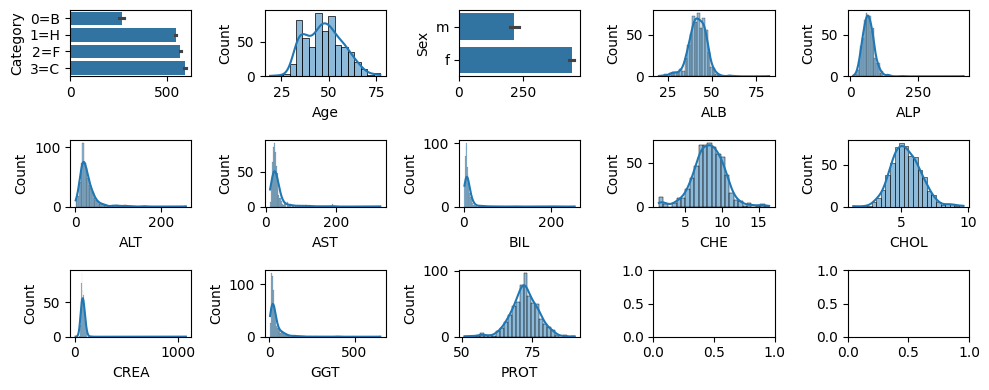


Í≤∞Ï∏° Ï≤òÎ¶¨ Ï†Ñ, Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º ÌôïÏù∏Ìïú Í≤∞Í≥º ÎåÄÎ∂ÄÎ∂Ñ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Í±∞ÎÇò ÌïúÏ™ΩÏúºÎ°ú Î∞ÄÏßëÎêú ÌòïÌÉúÏù¥Îã§. 
Ïù¥Ïóê Îî∞Îùº, Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ Î∞©Î≤ïÏúºÎ°úÎäî Îã§Ïùå Îëê Í∞ÄÏßÄÎ•º Ï†úÏãúÌïúÎã§.

‚ë† Î≥ÄÏàòÎ≥Ñ ÌèâÍ∑†Í∞íÏùÑ Ïù¥Ïö©Ìïú ÎåÄÏ≤¥: Îç∞Ïù¥ÌÑ∞ Ïú†Ïã§ÏùÑ Î∞©ÏßÄÌï† Ïàò ÏûàÏúºÎ©∞, Î∂ÑÌè¨ ÌäπÏÑ±ÏÉÅ ÌèâÍ∑†Í∞í ÎåÄÏ≤¥Í∞Ä ÏôúÍ≥°ÏùÑ ÏµúÏÜåÌôîÌï† Ïàò ÏûàÏùå  
‚ë° Í≤∞Ï∏°Í∞í Ìè¨Ìï® Ìñâ Ï†úÍ±∞: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò ÎåÄÎπÑ Í≤∞Ï∏° ÎπÑÏú®Ïù¥ 3% Ïù¥ÌïòÎ°ú Îß§Ïö∞ ÎÇÆÏïÑ ÏÇ≠Ï†úÏóê Îî∞Î•∏ ÏòÅÌñ•Ïù¥ ÌÅ¨ÏßÄ ÏïäÏùå

Îëê Î∞©ÏãùÏúºÎ°ú Ï≤òÎ¶¨ ÌõÑ, Î™®Îç∏ ÏÑ±Îä• Î∞è Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Î≥ÄÌôî Îì±ÏùÑ ÎπÑÍµêÌïòÏó¨ Îçî Ï†ÅÏ†àÌïú Î∞©Î≤ïÏùÑ ÏÑ†ÌÉùÌïúÎã§.



In [5]:
fig, axes = plt.subplots(3,5, figsize = (10, 4))

for i, axes in enumerate(axes.flat[:len(df.columns)]):
  col_i = df.columns[i]
  if df[col_i].dtype == 'object' :
    sns.barplot(df[col_i], ax = axes)

  else :
    sns.histplot(df[col_i], kde = True, ax = axes)

plt.tight_layout()
plt.show()
print('''
Í≤∞Ï∏° Ï≤òÎ¶¨ Ï†Ñ, Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º ÌôïÏù∏Ìïú Í≤∞Í≥º ÎåÄÎ∂ÄÎ∂Ñ Ï†ïÍ∑úÎ∂ÑÌè¨Î•º Îî∞Î•¥Í±∞ÎÇò ÌïúÏ™ΩÏúºÎ°ú Î∞ÄÏßëÎêú ÌòïÌÉúÏù¥Îã§.
Ïù¥Ïóê Îî∞Îùº, Í≤∞Ï∏°Í∞í Ï≤òÎ¶¨ Î∞©Î≤ïÏúºÎ°úÎäî Îã§Ïùå Îëê Í∞ÄÏßÄÎ•º Ï†úÏãúÌïúÎã§.

‚ë† Î≥ÄÏàòÎ≥Ñ ÌèâÍ∑†Í∞íÏùÑ Ïù¥Ïö©Ìïú ÎåÄÏ≤¥: Îç∞Ïù¥ÌÑ∞ Ïú†Ïã§ÏùÑ Î∞©ÏßÄÌï† Ïàò ÏûàÏúºÎ©∞, Î∂ÑÌè¨ ÌäπÏÑ±ÏÉÅ ÌèâÍ∑†Í∞í ÎåÄÏ≤¥Í∞Ä ÏôúÍ≥°ÏùÑ ÏµúÏÜåÌôîÌï† Ïàò ÏûàÏùå
‚ë° Í≤∞Ï∏°Í∞í Ìè¨Ìï® Ìñâ Ï†úÍ±∞: Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞ Ïàò ÎåÄÎπÑ Í≤∞Ï∏° ÎπÑÏú®Ïù¥ 3% Ïù¥ÌïòÎ°ú Îß§Ïö∞ ÎÇÆÏïÑ ÏÇ≠Ï†úÏóê Îî∞Î•∏ ÏòÅÌñ•Ïù¥ ÌÅ¨ÏßÄ ÏïäÏùå

Îëê Î∞©ÏãùÏúºÎ°ú Ï≤òÎ¶¨ ÌõÑ, Î™®Îç∏ ÏÑ±Îä• Î∞è Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨ Î≥ÄÌôî Îì±ÏùÑ ÎπÑÍµêÌïòÏó¨ Îçî Ï†ÅÏ†àÌïú Î∞©Î≤ïÏùÑ ÏÑ†ÌÉùÌïúÎã§.
''')

In [6]:
# ['ALB', 'ALP','ALT','CHOL', 'PROT]

# ÌèâÍ∑†ÎåÄÏ≤¥
df_mean = df.copy()
for col in df_mean.columns :
  if df_mean[col].isna().sum() > 0 :
    df_mean[col] = df_mean[col].fillna(df_mean[col].mean())

df_mean.shape

# ÏÇ≠Ï†ú Ï≤òÎ¶¨
df_drop = df.copy()
df_drop = df_drop.dropna()
df_drop.shape

table_mean = df_mean.describe().T[['mean','std','min','max']]
table_mean.columns = ['ÌèâÍ∑†ÎåÄÏ≤¥_mean' ,'ÌèâÍ∑†ÎåÄÏ≤¥_std','ÌèâÍ∑†ÎåÄÏ≤¥_min','ÌèâÍ∑†ÎåÄÏ≤¥_max']
table_drop = df_drop.describe().T[['mean','std','min','max']]
table_drop.columns = ['ÏÇ≠Ï†ú_mean' ,'ÏÇ≠Ï†ú_std','ÏÇ≠Ï†ú_min','ÏÇ≠Ï†ú_max']

res = pd.concat([table_mean, table_drop] , axis = 1)
display(res)

display(df.describe().T[['mean','std','min','max']])

print(f'''
ÌèâÍ∑† ÎåÄÏ≤¥ Ïãú : {df_mean.shape}
ÏÇ≠Ï†ú Ï≤òÎ¶¨ Ïùº Îïå : {df_drop.shape} ÏúºÎ°ú ÏÇ≠Ï†ú Ï≤òÎ¶¨ÏùºÎñÑ Í≤∞Ï∏° ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞ Ïú†Ïã§Ïù¥ ÏÉùÍ≤ºÎã§.
ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎäî Í≤ΩÏö∞ÏôÄ ÏÇ≠Ï†ú Ï≤òÎ¶¨Î•º ÌñàÏùÑÎïå Í≤∞Ï∏°Ïù¥ Í∞ÄÏû• ÎßéÏïòÎçò ALP Ïùò Í≤ΩÏö∞ ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®ÏóêÏÑú ÌÅ¨Í≤å Ï∞®Ïù¥Í∞Ä ÎÇòÏßÄ ÏïäÎäîÎã§.
Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÍ∞Ä 608Í∞úÏù∏Í≤ÉÏùÑ Í∞ÄÎßåÌïòÏó¨, ÌèâÍ∑† ÎåÄÏ≤¥Î•º ÏÇ¨Ïó¨ Î∂ÑÏÑùÏóê ÏÇ¨Ïö©ÌïúÎã§.
''')

ÌèâÍ∑†ÎåÄÏ≤¥_mean   ÌèâÍ∑†ÎåÄÏ≤¥_std  ÌèâÍ∑†ÎåÄÏ≤¥_min  ÌèâÍ∑†ÎåÄÏ≤¥_max    ÏÇ≠Ï†ú_mean     ÏÇ≠Ï†ú_std  ÏÇ≠Ï†ú_min  \
Age   47.291118   9.992705     19.00     77.00  47.295533   9.863890   23.00   
ALB   41.818781   5.402261     20.00     82.20  41.831443   5.369272   23.00   
ALP   67.821017  24.896859     11.30    416.60  67.651890  25.148941   11.30   
ALT   27.601318  21.210046      0.90    258.00  25.666838  14.920906    0.90   
AST   34.369408  32.622442     12.00    324.00  33.325086  32.357234   12.00   
BIL   11.474013  19.770558      1.80    254.00  11.094330  17.494290    1.80   
CHE    8.204885   2.168400      1.42     16.41   8.212337   2.151660    1.42   
CHOL   5.378829   1.110135      1.43      9.67   5.402646   1.114920    1.43   
CREA  81.513158  49.720652      8.00   1079.10  81.909107  50.669976    8.00   
GGT   38.243914  51.953220      4.50    650.90  36.835567  51.409352    4.50   
PROT  72.253213   4.928188     51.00     90.00  72.106357   4.857867   51.00   

       ÏÇ≠Ï†ú_max  
Age     77.00  
ALB     82.20  
ALP    416.60  
ALT    118.10  
AST    324.00  
BIL    209.00  
CHE     16.41  
CHOL     9.67  
CREA  1079.10  
GGT    650.90  
PROT    86.50

mean        std    min      max
Age   47.291118   9.992705  19.00    77.00
ALB   41.818781   5.406717  20.00    82.20
ALP   67.821017  25.274423  11.30   416.60
ALT   27.601318  21.227539   0.90   258.00
AST   34.369408  32.622442  12.00   324.00
BIL   11.474013  19.770558   1.80   254.00
CHE    8.204885   2.168400   1.42    16.41
CHOL   5.378829   1.119394   1.43     9.67
CREA  81.513158  49.720652   8.00  1079.10
GGT   38.243914  51.953220   4.50   650.90
PROT  72.253213   4.932252  51.00    90.00


ÌèâÍ∑† ÎåÄÏ≤¥ Ïãú : (608, 13) 
ÏÇ≠Ï†ú Ï≤òÎ¶¨ Ïùº Îïå : (582, 13) ÏúºÎ°ú ÏÇ≠Ï†ú Ï≤òÎ¶¨ÏùºÎñÑ Í≤∞Ï∏° ÎßåÌÅºÏùò Îç∞Ïù¥ÌÑ∞ Ïú†Ïã§Ïù¥ ÏÉùÍ≤ºÎã§. 
ÌèâÍ∑†ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÎäî Í≤ΩÏö∞ÏôÄ ÏÇ≠Ï†ú Ï≤òÎ¶¨Î•º ÌñàÏùÑÎïå Í≤∞Ï∏°Ïù¥ Í∞ÄÏû• ÎßéÏïòÎçò ALP Ïùò Í≤ΩÏö∞ ÌèâÍ∑†Í≥º ÌëúÏ§ÄÌé∏Ï∞®ÏóêÏÑú ÌÅ¨Í≤å Ï∞®Ïù¥Í∞Ä ÎÇòÏßÄ ÏïäÎäîÎã§. 
Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÍ∞Ä 608Í∞úÏù∏Í≤ÉÏùÑ Í∞ÄÎßåÌïòÏó¨, ÌèâÍ∑† ÎåÄÏ≤¥Î•º ÏÇ¨Ïó¨ Î∂ÑÏÑùÏóê ÏÇ¨Ïö©ÌïúÎã§. 



## 1-2 Ïù¥ÏÉÅÏπòÎ•º ÌôïÏù∏ÌïòÍ≥† Ï≤òÎ¶¨ Ïó¨Î∂Ä ÌåêÎã® ÌõÑ ÏûëÏóÖ


ÎåÄÎ∂ÄÎ∂ÑÏùò Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêòÏñ¥ÏßÑÎã§. ÌïòÏßÄÎßå Í∞ÑÏóº Îì±Í∏âÍ≥º Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÎ•º Í≥†Î†§ÌïòÎ©¥
Ïù¥ÏÉÅÏπòÍ∞Ä Îì±Í∏âÏùÑ Ï†ïÌïòÎäî ÏöîÏù∏ÏúºÎ°ú ÌåêÎã®Îê† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨Î•º ÌïòÏßÄ ÏïäÎäîÎã§. 



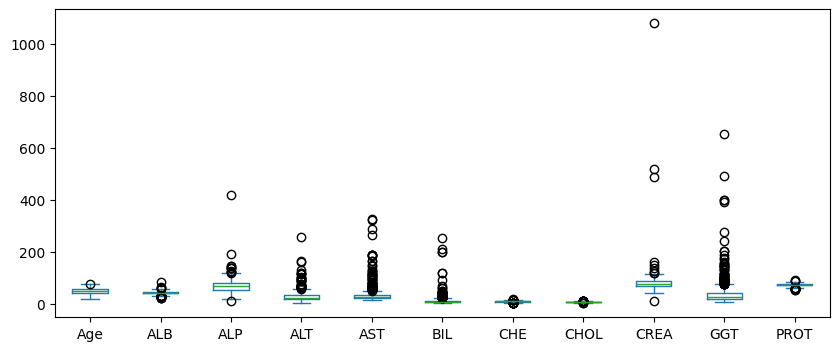

In [7]:
# df_mean
cols = df_mean.select_dtypes(exclude = 'object').columns.to_list()
df_mean[cols].plot(kind = 'box' , figsize = (10,4))

print('''
ÎåÄÎ∂ÄÎ∂ÑÏùò Îç∞Ïù¥ÌÑ∞ÏóêÏÑú Ïù¥ÏÉÅÏπòÍ∞Ä ÏûàÎäî Í≤ÉÏúºÎ°ú ÌåêÎã®ÎêòÏñ¥ÏßÑÎã§. ÌïòÏßÄÎßå Í∞ÑÏóº Îì±Í∏âÍ≥º Îç∞Ïù¥ÌÑ∞Ïùò ÏàòÎ•º Í≥†Î†§ÌïòÎ©¥
Ïù¥ÏÉÅÏπòÍ∞Ä Îì±Í∏âÏùÑ Ï†ïÌïòÎäî ÏöîÏù∏ÏúºÎ°ú ÌåêÎã®Îê† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨Î•º ÌïòÏßÄ ÏïäÎäîÎã§.
''')

#### ‚úÖ1-3 ÏúÑ Îëê ÏûëÏóÖ Ï†ÅÏö© ÌõÑ EDA ÏßÑÌñâ Î∞è Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎùº (ÏãúÍ∞ÅÌôîÌè¨Ìï®)

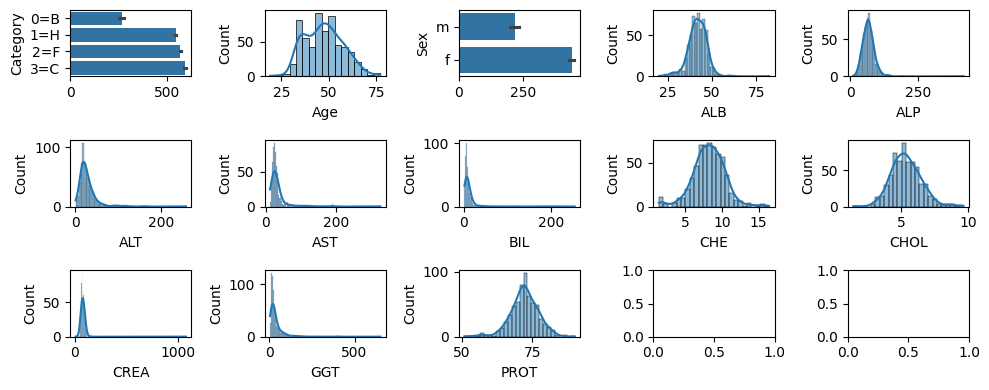

In [8]:
fig, axes = plt.subplots(3,5, figsize = (10, 4))

for i, axes in enumerate(axes.flat[:len(df_mean.columns)]):
  col_i = df.columns[i]
  if df_mean[col_i].dtype == 'object' :
    sns.barplot(df_mean[col_i], ax = axes)

  else :
    sns.histplot(df_mean[col_i], kde = True, ax = axes)

plt.tight_layout()
plt.show()

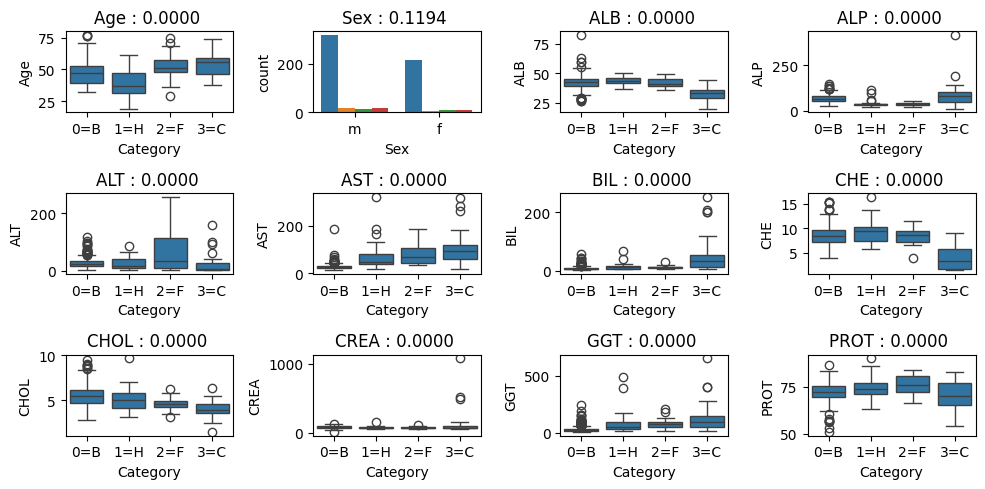

col         p_val
0    Age  9.425871e-08
1    Sex  1.193555e-01
2    ALB  5.808575e-21
3    ALP  3.443465e-11
4    ALT  2.507966e-11
5    AST  4.194864e-74
6    BIL  4.000225e-48
7    CHE  3.336676e-32
8   CHOL  9.641726e-13
9   CREA  2.680767e-09
10   GGT  1.357179e-36
11  PROT  1.428266e-05


Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§. 
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§. 

Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Ïπ¥Ïù¥Ï†úÍ≥±ÏúºÎ°ú, Ïà´ÏûêÌòï Î≥ÄÏàòÎäî ANOVA Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Î∂ÑÏÑùÌïú Í≤∞Í≥º Î™®Îì† Ïª¨ÎüºÏùò p_val < 0.05 ÏúºÎ°ú Category(Ï¢ÖÏÜçÎ≥ÄÏàò)Î≥Ñ 
Í∞Å Ïª¨ÎüºÏùò ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§Îäî Í≤∞Î°†Ïù¥ ÎÇòÏôîÎã§. 



In [9]:
#  Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏  ['0=B', '1=H', '2=F', '3=C']
import scipy.stats as stats

fig, axes = plt.subplots(3,4, figsize = (10, 5))

res = []
for i, axes in enumerate(axes.flat[:len(df_mean.columns[1:])]):
    col_i = df_mean.columns[1:][i]
    if df_mean[col_i].dtype == 'object' :
      target = pd.crosstab(df_mean[col_i], df_mean['Category'])
      stat, p_val, dof, expected = stats.chi2_contingency(target)
      sns.countplot(data = df_mean, x = col_i, hue = 'Category', ax = axes)
      axes.set_title(f'{col_i} : {p_val:.4f} ')


    else:
      groups = [df_mean[df_mean['Category'] == g ][col_i] for g in df_mean['Category'].unique()]
      f_val , p_val = stats.f_oneway(*groups)
      sns.boxplot(x = 'Category', y = df[col_i], data = df_mean, ax = axes)
      axes.set_title(f'{col_i} : {p_val:.4f} ')

    res.append([col_i, p_val])

    if axes.get_legend() :
      axes.get_legend().remove()


plt.tight_layout()
plt.show()

display(pd.DataFrame(res, columns = ['col','p_val']))
print('''
Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú Í∞Å ÎèÖÎ¶ΩÎ≥ÄÏàòÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§.

Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Ïπ¥Ïù¥Ï†úÍ≥±ÏúºÎ°ú, Ïà´ÏûêÌòï Î≥ÄÏàòÎäî ANOVA Î∂ÑÏÑùÏùÑ ÌÜµÌï¥ Î∂ÑÏÑùÌïú Í≤∞Í≥º Î™®Îì† Ïª¨ÎüºÏùò p_val < 0.05 ÏúºÎ°ú Category(Ï¢ÖÏÜçÎ≥ÄÏàò)Î≥Ñ
Í∞Å Ïª¨ÎüºÏùò ÌèâÍ∑†Ïù¥ Îã§Î•¥Îã§Îäî Í≤∞Î°†Ïù¥ ÎÇòÏôîÎã§.
''')

#### ‚úÖ 1-4 Ï£ºÏñ¥ÏßÑ Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ Ï£ºÏÑ±Î∂ÑÎ∂ÑÏÑùÏùÑ ÏàòÌñâÌï¥ ÏÉàÎ°úÏö¥ ÏÑ§Î™ÖÎ≥ÄÏàòÎ•º ÎèÑÏ∂úÌï† Ïàò ÏûàÎäîÏßÄÎ•º Í≤ÄÌÜ† ‚àô ÌåêÎã®Ìïú Îí§, Í∑∏ Í≤∞Í≥ºÎ•º Ï†úÏãúÌïòÏãúÏò§

0         1         2         3         4         5         6   \
ratio   0.216058  0.164849  0.128105  0.098711  0.080541  0.070669  0.066784   
cumsum  0.216058  0.380907  0.509012  0.607723  0.688264  0.758933  0.825717   

              7         8         9         10  
ratio   0.056805  0.044153  0.042646  0.030679  
cumsum  0.882522  0.926675  0.969321  1.000000


PCA Î∂ÑÏÑù Í≤∞Í≥º Ï†ÑÏ≤¥ 6Í∞úÏùò Ï£ºÏÑ±Î∂ÑÏù¥ Îç∞Ïù¥ÌÑ∞Ïùò 82%ÏùÑ ÏÑ§Î™ÖÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. Ïù¥Îäî Ï†ÑÏ≤¥ Î∂ÑÏÇ∞Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÑ
6Í∞úÏùò Ï£ºÏÑ±Î∂ÑÏúºÎ°ú ÏÑ§Î™ÖÏù¥ Í∞ÄÎä•ÌïòÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïòÎ©∞, Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Í≥º Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏùò Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Ïàò ÏûàÎã§Í≥† ÌåêÎã®ÎêúÎã§.
Í≤∞Î°†Ï†ÅÏúºÎ°ú, PCAÎ•º ÌÜµÌïú Ï£ºÏÑ±Î∂ÑÎì§ÏùÄ ÏÑ§Î™Ö Î≥ÄÏàòÎ°ú ÌôúÏö©Ìï† Ïàò ÏûàÎäî ÌÉÄÎãπÏÑ±Ïù¥ ÏûàÎã§Í≥† Î≥¥Ïó¨ÏßÑÎã§. 



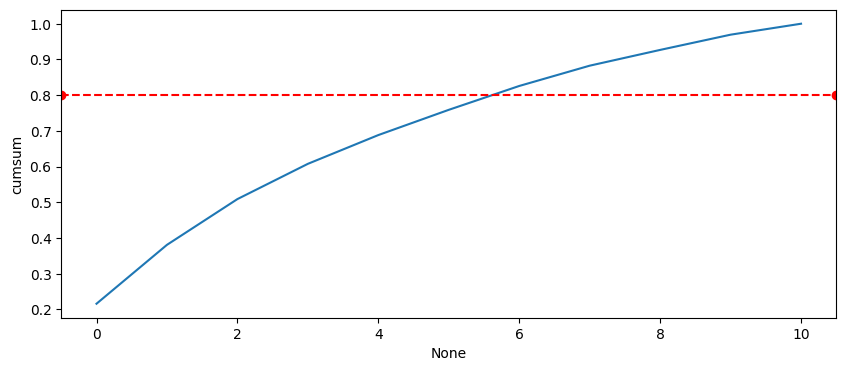

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing  import StandardScaler

num_df = df_mean[df_mean.select_dtypes(exclude = 'object').columns]


ss  = StandardScaler()
scaled_x = pd.DataFrame(ss.fit_transform(num_df) , columns = num_df.columns)

pca = PCA()
pca.fit(scaled_x)

pca_result = pd.DataFrame({
    'ratio' : pca.explained_variance_ratio_,
    'cumsum' : pca.explained_variance_ratio_.cumsum()
})

plt.figure(figsize = (10, 4))
sns.lineplot(x = pca_result.index, y= pca_result['cumsum'])
plt.axhline(0.8, marker = 'o', color = 'red', linestyle = '--')
display(pca_result.T)

print('''
PCA Î∂ÑÏÑù Í≤∞Í≥º Ï†ÑÏ≤¥ 6Í∞úÏùò Ï£ºÏÑ±Î∂ÑÏù¥ Îç∞Ïù¥ÌÑ∞Ïùò 82%ÏùÑ ÏÑ§Î™ÖÌïòÎäî Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§. Ïù¥Îäî Ï†ÑÏ≤¥ Î∂ÑÏÇ∞Ïùò ÏÉÅÎãπ Î∂ÄÎ∂ÑÏùÑ
6Í∞úÏùò Ï£ºÏÑ±Î∂ÑÏúºÎ°ú ÏÑ§Î™ÖÏù¥ Í∞ÄÎä•ÌïòÎã§Îäî Í≤ÉÏùÑ ÏùòÎØ∏ÌïòÎ©∞, Îã§Ï§ëÍ≥µÏÑ†ÏÑ±Í≥º Î≥ÄÏàòÎì§ Í∞ÑÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏùò Î¨∏Ï†úÎ•º Ìï¥Í≤∞Ìï† Ïàò ÏûàÎã§Í≥† ÌåêÎã®ÎêúÎã§.
Í≤∞Î°†Ï†ÅÏúºÎ°ú, PCAÎ•º ÌÜµÌïú Ï£ºÏÑ±Î∂ÑÎì§ÏùÄ ÏÑ§Î™Ö Î≥ÄÏàòÎ°ú ÌôúÏö©Ìï† Ïàò ÏûàÎäî ÌÉÄÎãπÏÑ±Ïù¥ ÏûàÎã§Í≥† Î≥¥Ïó¨ÏßÑÎã§.
''')

In [11]:
num_df = df_mean[df_mean.select_dtypes(exclude = 'object').columns]


ss  = StandardScaler()
scaled_x = pd.DataFrame(ss.fit_transform(num_df) , columns = num_df.columns)

pca = PCA(n_components= 6)
pca6_df = pd.DataFrame(pca.fit_transform(scaled_x) , columns = ['PC_' + str(x) for x in range(6)])
#pca6_df

## 2-1 Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÏù¥ Ïôú Î¨∏Ï†úÏù∏ÏßÄ ÏÑ§Î™ÖÌïòÍ≥† Î∂àÍ∑†Ìòï Ìï¥Í≤∞Î∞©Î≤ïÏóê ÎåÄÌï¥ ÎëêÍ∞ÄÏßÄÎ•º ÏÑ§Î™ÖÌïòÎùº

In [12]:
print('''
Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÏù¥ÎûÄ ÌäπÏ†ï ÌÅ¥ÎûòÏä§Í∞Ä Îã§Î•∏ ÌÅ¥ÎûòÎ≥¥Îã§ ÌòÑÏ†ÄÌûà ÎßéÍ±∞ÎÇò, Ï†ÅÏùÄ Í≤ΩÏö∞Î•º ÎßêÌïúÎã§.
Ïù¥Îäî Îã§ÏàòÏùò ÌÅ¥ÎûòÏä§ ÌòπÏùÄ ÏÜåÏàòÏùò ÌÅ¥ÎûòÏä§ÏóêÎßå ÏßëÏ§ëÎêòÏñ¥ Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥ÏßÄÍ±∞ÎÇò, Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÎ•º ÎÇÆÏ∂îÎäî Îì±Ïùò Ìé∏Ìñ•Ïù¥ Î∞úÏÉùÌïòÍ∏∞
ÎïåÎ¨∏Ïóê Î™®Îç∏Ïùò Ïã†Î¢∞ÎèÑÏôÄ Ï†ïÌôïÎèÑÏóê Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏¥Îã§.

Ìï¥Í≤∞ Î∞©Î≤ï)
1. **Ïò§Î≤ÑÏÉòÌîåÎßÅ (Oversampling)**
   - ÏÜåÏàò ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ïù∏ÏúÑÏ†ÅÏúºÎ°ú ÎäòÎ†§ÏÑú Îã§Ïàò ÌÅ¥ÎûòÏä§ÏôÄÏùò ÎπÑÏú®ÏùÑ ÎßûÏ∂îÎäî Î∞©Î≤ï
   - Ïòà: SMOTE(Synthetic Minority Over-sampling Technique) Îì±

2. **Ïñ∏ÎçîÏÉòÌîåÎßÅ (Undersampling)**
   - Îã§Ïàò ÌÅ¥ÎûòÏä§Ïùò ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞ÌïòÏó¨, ÏÜåÏàò ÌÅ¥ÎûòÏä§ÏôÄ Í∑†ÌòïÏùÑ ÎßûÏ∂îÎäî Î∞©Î≤ï
   - Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§ ÏúÑÌóòÏù¥ ÏûàÏßÄÎßå, Îπ†Î•¥Í≤å Î∂àÍ∑†ÌòïÏùÑ Ìï¥ÏÜåÌï† Ïàò ÏûàÏùå

''')


Îç∞Ïù¥ÌÑ∞ Î∂àÍ∑†ÌòïÏù¥ÎûÄ ÌäπÏ†ï ÌÅ¥ÎûòÏä§Í∞Ä Îã§Î•∏ ÌÅ¥ÎûòÎ≥¥Îã§ ÌòÑÏ†ÄÌûà ÎßéÍ±∞ÎÇò, Ï†ÅÏùÄ Í≤ΩÏö∞Î•º ÎßêÌïúÎã§. 
Ïù¥Îäî Îã§ÏàòÏùò ÌÅ¥ÎûòÏä§ ÌòπÏùÄ ÏÜåÏàòÏùò ÌÅ¥ÎûòÏä§ÏóêÎßå ÏßëÏ§ëÎêòÏñ¥ Ï†ïÌôïÎèÑÍ∞Ä Îñ®Ïñ¥ÏßÄÍ±∞ÎÇò, Î™®Îç∏Ïùò Ï†ïÌôïÎèÑÎ•º ÎÇÆÏ∂îÎäî Îì±Ïùò Ìé∏Ìñ•Ïù¥ Î∞úÏÉùÌïòÍ∏∞
ÎïåÎ¨∏Ïóê Î™®Îç∏Ïùò Ïã†Î¢∞ÎèÑÏôÄ Ï†ïÌôïÎèÑÏóê Î¨∏Ï†úÍ∞Ä ÏÉùÍ∏¥Îã§.

Ìï¥Í≤∞ Î∞©Î≤ï)
1. **Ïò§Î≤ÑÏÉòÌîåÎßÅ (Oversampling)**  
   - ÏÜåÏàò ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞Î•º Ïù∏ÏúÑÏ†ÅÏúºÎ°ú ÎäòÎ†§ÏÑú Îã§Ïàò ÌÅ¥ÎûòÏä§ÏôÄÏùò ÎπÑÏú®ÏùÑ ÎßûÏ∂îÎäî Î∞©Î≤ï  
   - Ïòà: SMOTE(Synthetic Minority Over-sampling Technique) Îì±  

2. **Ïñ∏ÎçîÏÉòÌîåÎßÅ (Undersampling)**  
   - Îã§Ïàò ÌÅ¥ÎûòÏä§Ïùò ÏùºÎ∂Ä Îç∞Ïù¥ÌÑ∞Î•º Ï†úÍ±∞ÌïòÏó¨, ÏÜåÏàò ÌÅ¥ÎûòÏä§ÏôÄ Í∑†ÌòïÏùÑ ÎßûÏ∂îÎäî Î∞©Î≤ï  
   - Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§ ÏúÑÌóòÏù¥ ÏûàÏßÄÎßå, Îπ†Î•¥Í≤å Î∂àÍ∑†ÌòïÏùÑ Ìï¥ÏÜåÌï† Ïàò ÏûàÏùå




## 2-2 Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ Î∂ÑÎ•òÎ™®Îç∏Ïóê Ï†ÅÌï©Ìïú ÌèâÍ∞ÄÏßÄÌëú 3Í∞ú Ï†úÏãúÌïòÍ≥† Í∑∏ Ïù¥Ïú† ÏÑ§Î™ÖÌïòÎùº

In [13]:
print('''
Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞, Ï†ïÌôïÎèÑ Î≥¥Îã§Îäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï¢Ä Îçî Ïã†Î¢∞ÏÑ±ÏûàÎäî ÌèâÍ∞Ä ÏßÄÌëúÎ•º ÌôúÏö©ÌïúÎã§.
1) Ï†ïÎ∞ÄÎèÑ - ÏñëÏÑ±ÏúºÎ°ú ÏòàÏ∏°Ìïú Í≤É Ï§ëÏóê Ïã§Ï†úÎ°ú ÎßûÏ∂ò ÎπÑÏú® (TP/(TP+FP))
            ÏòàÏ∏°Ïùò Ïã†Î¢∞ÏÑ±ÏùÑ ÌèâÍ∞ÄÌï®ÏúºÎ°úÏç® FPÍ∞Ä ÏñºÎßàÎÇò Ï§ÑÏóàÎäîÏßÄ Ïïå Ïàò ÏûàÎã§.

2) Ïû¨ÌòÑÏú® - Ïã§Ï†ú ÏñëÏÑ±Ïù∏Í≤ÉÏùÑ Ï§ëÏóê ÏñëÏÑ±ÏúºÎ°ú ÏòàÏ∏°Ìïú ÎπÑÏú®
            ÏÜåÏàò ÌÅ¥ÎûòÏä§ ÌÉêÏßÄÏú®ÏùÑ ÎÜíÏù¥ÎäîÎç∞ Ï§ëÏ†êÏùÑ ÎëîÎã§.

3) F1-score - Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®Ïùò Í∑†ÌòïÏùÑ Í≥†Î†§Ìïú Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ ÏÉÅÌô©ÏóêÏÑú Í∞ÄÏû• ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïã†Î¢∞Î∞õÎäî ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú
''')


Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞, Ï†ïÌôïÎèÑ Î≥¥Îã§Îäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Ï¢Ä Îçî Ïã†Î¢∞ÏÑ±ÏûàÎäî ÌèâÍ∞Ä ÏßÄÌëúÎ•º ÌôúÏö©ÌïúÎã§.
1) Ï†ïÎ∞ÄÎèÑ - ÏñëÏÑ±ÏúºÎ°ú ÏòàÏ∏°Ìïú Í≤É Ï§ëÏóê Ïã§Ï†úÎ°ú ÎßûÏ∂ò ÎπÑÏú® (TP/(TP+FP))
            ÏòàÏ∏°Ïùò Ïã†Î¢∞ÏÑ±ÏùÑ ÌèâÍ∞ÄÌï®ÏúºÎ°úÏç® FPÍ∞Ä ÏñºÎßàÎÇò Ï§ÑÏóàÎäîÏßÄ Ïïå Ïàò ÏûàÎã§. 

2) Ïû¨ÌòÑÏú® - Ïã§Ï†ú ÏñëÏÑ±Ïù∏Í≤ÉÏùÑ Ï§ëÏóê ÏñëÏÑ±ÏúºÎ°ú ÏòàÏ∏°Ìïú ÎπÑÏú® 
            ÏÜåÏàò ÌÅ¥ÎûòÏä§ ÌÉêÏßÄÏú®ÏùÑ ÎÜíÏù¥ÎäîÎç∞ Ï§ëÏ†êÏùÑ ÎëîÎã§. 

3) F1-score - Ï†ïÎ∞ÄÎèÑ, Ïû¨ÌòÑÏú®Ïùò Í∑†ÌòïÏùÑ Í≥†Î†§Ìïú Î∂àÍ∑†Ìòï Îç∞Ïù¥ÌÑ∞ ÏÉÅÌô©ÏóêÏÑú Í∞ÄÏû• ÏùºÎ∞òÏ†ÅÏúºÎ°ú Ïã†Î¢∞Î∞õÎäî ÏÑ±Îä• ÌèâÍ∞Ä ÏßÄÌëú



#### ‚úÖ 2-3 Ï¢ÖÏÜç Î≥ÄÏàòÎ•º Ï†ïÏÉÅ(Category 0)Í≥º ÎπÑÏ†ïÏÉÅ(Category 1,2,3)Î°ú Î≥ÄÍ≤ΩÌïú ÌõÑ ÏúÑÏùò 2Í∞ÄÏßÄ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≥†, 3Í∞ÄÏßÄ ÌèâÍ∞ÄÏßÄÌëúÎ°ú Í≤∞Í≥ºÎ•º Í∞ÅÍ∞Å ÌèâÍ∞ÄÌïòÎùº.
(ÌïôÏäµ Í∑úÏπô)
- Ï¢ÖÏÜç Î≥ÄÏàòÎ•º Ïù¥ÏßÑÌôî ÌõÑ Î∂àÍ∑†Ìòï Ï≤òÎ¶¨ Î∞©Î≤ï ÏßÑÌñâ
- Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌñâÏùò index numberÎ•º Ï¥àÍ∏∞Ìôî ÌïòÎùº(0Î∂ÄÌÑ∞ ÏãúÏûë)
- index number Í∞íÏù¥ 5Î°ú ÎÇòÎàà ÎÇòÎ®∏ÏßÄÍ∞Ä 0Ïù¥ÎùºÎ©¥ test, Í∑∏ Ïô∏Ïùò Í≤ΩÏö∞ train setÏúºÎ°ú ÌïòÏó¨ ÏßÑÌñâ
- 3Í∞ÄÏßÄ Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎùº

In [14]:
print('''

Î™®Îç∏ Î∂ÑÎ•òÎ•º ÏúÑÌï¥ , ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏, ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†, Logistic Regression Ïùò Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïú ÌõÑ,
Ïû¨ÌòÑÏú®, Ï†ïÎ∞ÄÎèÑ, F1-score, Ï†ïÌôïÎèÑÏùò ÌèâÍ∞Ä ÏßÄÌëúÎ°ú Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïúÎã§.

1) ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏
  - Í≥ºÏ†ÅÌï© Î∞©ÏßÄ Îä•Î†•Ïóê Îõ∞Ïñ¥ÎÇòÎ©∞, ÎπÑÏÑ†Ìòï Î∂ÑÎ•òÏóê Í∞ïÌï®

2) ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†
  - ÏÜåÏàò ÌÅ¥ÎûòÏä§Ïóê ÎØºÍ∞êÌï® ÎßàÏßÑ Í∏∞Î∞òÏùò ÌïôÏäµ, Ïª§ÎÑê Í∏∞Î∞òÏùò Ìö®Í≥ºÏ†ÅÏù∏ Î∂ÑÎ•ò Í∏∞Îä•

3) Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä
  - Îπ†Î•¥Í≥† Ìö®Ïú®Ï†ÅÏù¥Î©∞, Ìï¥ÏÑùÎ†•Ïù¥ ÎÜíÏùå, ÌôïÎ•† Í∏∞Î∞ò ÏòàÏ∏° Í∞ÄÎä• (Í∏∞Î≥∏Ï†ÅÏù∏ Î™®Îç∏)
''')



Î™®Îç∏ Î∂ÑÎ•òÎ•º ÏúÑÌï¥ , ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏, ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†, Logistic Regression Ïùò Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïú ÌõÑ, 
Ïû¨ÌòÑÏú®, Ï†ïÎ∞ÄÎèÑ, F1-score, Ï†ïÌôïÎèÑÏùò ÌèâÍ∞Ä ÏßÄÌëúÎ°ú Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïúÎã§. 

1) ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ 
  - Í≥ºÏ†ÅÌï© Î∞©ÏßÄ Îä•Î†•Ïóê Îõ∞Ïñ¥ÎÇòÎ©∞, ÎπÑÏÑ†Ìòï Î∂ÑÎ•òÏóê Í∞ïÌï® 

2) ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã† 
  - ÏÜåÏàò ÌÅ¥ÎûòÏä§Ïóê ÎØºÍ∞êÌï® ÎßàÏßÑ Í∏∞Î∞òÏùò ÌïôÏäµ, Ïª§ÎÑê Í∏∞Î∞òÏùò Ìö®Í≥ºÏ†ÅÏù∏ Î∂ÑÎ•ò Í∏∞Îä• 

3) Î°úÏßÄÏä§Ìã± ÌöåÍ∑Ä 
  - Îπ†Î•¥Í≥† Ìö®Ïú®Ï†ÅÏù¥Î©∞, Ìï¥ÏÑùÎ†•Ïù¥ ÎÜíÏùå, ÌôïÎ•† Í∏∞Î∞ò ÏòàÏ∏° Í∞ÄÎä• (Í∏∞Î≥∏Ï†ÅÏù∏ Î™®Îç∏)



In [15]:
r_df = df_mean.copy()
r_df['new_cate'] = r_df['Category'].str.split('=').str[0]

r_df['y'] = r_df['new_cate'].apply(lambda x : 1 if x =='0' else  0)
r_df = r_df[['y','Sex']]
r_df['Sex'] = r_df['Sex'].map({'m' : 1, 'f' :0})


# Ìï©ÏÑ† Ï£ºÏÑ±Î∂Ñ Îç∞Ïù¥ÌÑ∞Ìôî Î≥ëÌï®
f_df = pd.concat([pca6_df , r_df], axis = 1).reset_index(drop = True)

X = f_df.drop(columns = 'y', axis = 1)
y = f_df['y']

print('ÏõêÎ≥∏Îç∞Ïù¥ÌÑ∞')
print(y.value_counts())


ÏõêÎ≥∏Îç∞Ïù¥ÌÑ∞
y
1    533
0     75
Name: count, dtype: int64


In [16]:
# Over Sampling
# --- Over Sampling
over =RandomOverSampler()
over_x , over_y = over.fit_resample(X, y)
print('Ïò§Î≤Ñ ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞')
print(over_y.value_counts())

## Îç∞Ïù¥ÌÑ∞ ÏÖã ÏÑ§Ï†ï - Train
x_over_train = over_x[over_x.index % 5 != 0].reset_index(drop =True)
y_over_train = over_y[over_y.index % 5 != 0].reset_index(drop =True)

x_over_test = over_x[over_x.index % 5 ==0].reset_index(drop =True)
y_over_test = over_y[over_y.index % 5 == 0].reset_index(drop =True)


def eval_model(name, model) :
  model.fit(x_over_train, y_over_train)
  pred = model.predict(x_over_test)
  recall = recall_score(y_over_test, pred)
  precision = precision_score(y_over_test, pred)
  acc = accuracy_score(y_over_test, pred)
  f1 = f1_score(y_over_test, pred)

  return recall, precision, acc, f1

res = []
for name, model in [['rf' , RandomForestClassifier()] , ['SVC' , SVC()], ['LC', LogisticRegression()]] :
  recall, precision, acc, f1 = eval_model(name, model)
  res.append([name, recall, precision, acc, f1])


over_result = pd.DataFrame(res, columns = ['Model_Name','Recall','Precision', 'Accuracy', 'F1_score'])
display(over_result)


Ïò§Î≤Ñ ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞
y
1    533
0    533
Name: count, dtype: int64


Model_Name    Recall  Precision  Accuracy  F1_score
0         rf  0.981308   1.000000  0.990654  0.990566
1        SVC  0.925234   0.961165  0.943925  0.942857
2         LC  0.915888   0.844828  0.873832  0.878924

In [17]:
# -- Under Sampling
under =RandomUnderSampler()
under_x , under_y = under.fit_resample(X, y)
print('Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞')
print(under_y.value_counts())


x_under_train = under_x[under_x.index % 5 != 0].reset_index(drop =True)
y_under_train = under_y[under_y.index % 5 != 0].reset_index(drop =True)

x_under_test = under_x[under_x.index % 5 == 0].reset_index(drop =True)
y_under_test = under_y[under_y.index % 5 == 0].reset_index(drop =True)


def eval_model(name, model) :
  model.fit(x_under_train, y_under_train)
  pred = model.predict(x_under_test)
  recall = recall_score(y_under_test, pred)
  precision = precision_score(y_under_test, pred)
  acc = accuracy_score(y_under_test, pred)
  f1 = f1_score(y_under_test, pred)

  return recall, precision, acc, f1

res = []
for name, model in [['rf' , RandomForestClassifier()] , ['SVC' , SVC()], ['LC', LogisticRegression()]] :
  recall, precision, acc, f1 = eval_model(name, model)
  res.append([name, recall, precision, acc, f1])

under_result = pd.DataFrame(res, columns = ['Model_Name','Recall','Precision', 'Accuracy', 'F1_score'])
display(under_result)

Ïñ∏Îçî ÏÉòÌîåÎßÅ Îç∞Ïù¥ÌÑ∞
y
0    75
1    75
Name: count, dtype: int64


Model_Name    Recall  Precision  Accuracy  F1_score
0         rf  0.777778   0.933333  0.848485  0.848485
1        SVC  0.888889   0.888889  0.878788  0.888889
2         LC  0.833333   0.937500  0.878788  0.882353

In [18]:
display(over_result)
display(under_result)
print('''
Îëê Í∞ÄÏßÄÏùò ÏÉòÌîåÎßÅ Í≤∞Í≥ºÎ•º ÎπÑÍµê Ìïú Í≤∞Í≥º RandomForest, ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†, Î°úÏßÄÏä§Ìã± Î∂ÑÎ•ò ÌöåÍ∑ÄÏùò 3Í∞ÄÏßÄ Î™®Îç∏ÏóêÏÑú
Ïû¨ÌòÑÏú®Ïù¥, Ï†ïÌôïÎèÑ, F1-score Í∞Ä Ïñ∏Îçî ÏÉòÌîåÎßÅÎ≥¥Îã§ Ïò§Î≤Ñ ÏÉòÌîåÎßÅ Í≤∞Í≥ºÏóêÏÑú Ï¢Ä Îçî Ï†ïÌôïÌïú Î∂ÑÎ•ò Î™®Îç∏Î°ú ÌôïÏù∏ÎêúÎã§.
Îã®, Ïû¨ÌòÑÏú®ÏùÑ Í≥†Î†§Ìïú Î™®Îç∏ÏùÄ Ïñ∏Îçî ÏÉòÌîåÎßÅÏùò SVC Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäîÍ≤ÉÏù¥ Ï†ÅÏ†àÌï¥Î≥¥Ïù∏Îã§.
''')

Model_Name    Recall  Precision  Accuracy  F1_score
0         rf  0.981308   1.000000  0.990654  0.990566
1        SVC  0.925234   0.961165  0.943925  0.942857
2         LC  0.915888   0.844828  0.873832  0.878924

Model_Name    Recall  Precision  Accuracy  F1_score
0         rf  0.777778   0.933333  0.848485  0.848485
1        SVC  0.888889   0.888889  0.878788  0.888889
2         LC  0.833333   0.937500  0.878788  0.882353


Îëê Í∞ÄÏßÄÏùò ÏÉòÌîåÎßÅ Í≤∞Í≥ºÎ•º ÎπÑÍµê Ìïú Í≤∞Í≥º RandomForest, ÏÑúÌè¨Ìä∏ Î≤°ÌÑ∞ Î®∏Ïã†, Î°úÏßÄÏä§Ìã± Î∂ÑÎ•ò ÌöåÍ∑ÄÏùò 3Í∞ÄÏßÄ Î™®Îç∏ÏóêÏÑú
Ïû¨ÌòÑÏú®Ïù¥, Ï†ïÌôïÎèÑ, F1-score Í∞Ä Ïñ∏Îçî ÏÉòÌîåÎßÅÎ≥¥Îã§ Ïò§Î≤Ñ ÏÉòÌîåÎßÅ Í≤∞Í≥ºÏóêÏÑú Ï¢Ä Îçî Ï†ïÌôïÌïú Î∂ÑÎ•ò Î™®Îç∏Î°ú ÌôïÏù∏ÎêúÎã§. 
Îã®, Ïû¨ÌòÑÏú®ÏùÑ Í≥†Î†§Ìïú Î™®Îç∏ÏùÄ Ïñ∏Îçî ÏÉòÌîåÎßÅÏùò SVC Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎäîÍ≤ÉÏù¥ Ï†ÅÏ†àÌï¥Î≥¥Ïù∏Îã§. 



#### ‚úÖ 3-1 1ÏóêÏÑú Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£åÌïú Îç∞Ïù¥ÌÑ∞Î•º Î∞îÌÉïÏúºÎ°ú Ï¢ÖÏÜçÎ≥ÄÏàòÏóêÏÑú 0ÏùÑ Ï†úÏô∏Ìïú 1,2,3Ïùò Îç∞Ïù¥ÌÑ∞Îßå ÌïÑÌÑ∞ÌïòÏó¨ Î∂ÑÎ•òÎ™®Îç∏ ÌïôÏäµ Î∞è ÌèâÍ∞ÄÎ•º ÏßÑÌñâÌïòÎùº.
(ÌïôÏäµ Í∑úÏπô)
- Ï†ÑÏ≤òÎ¶¨ ÌõÑ Îç∞Ïù¥ÌÑ∞ ÌñâÏùò index numberÎ•º Ï¥àÍ∏∞Ìôî ÌïòÎùº(0Î∂ÄÌÑ∞ ÏãúÏûë)
- index number Í∞íÏù¥ 5Î°ú ÎÇòÎàà ÎÇòÎ®∏ÏßÄÍ∞Ä 0Ïù¥ÎùºÎ©¥ test, Í∑∏ Ïô∏Ïùò Í≤ΩÏö∞ train setÏúºÎ°ú ÌïòÏó¨ ÏßÑÌñâ
- 3Í∞úÏùò Î∂ÑÎ•ò Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÎùº

In [19]:
r_df2 = df_mean.copy()
r_df2['new_cate'] = r_df2['Category'].str.split('=').str[0].astype(int)

r_df2 = r_df2[r_df2['new_cate'] != 0]
r_df2['Sex'] = r_df2['Sex'].map({'m' : 1, 'f' :0})

# Ïª¨Îüº ÏÑ†ÌÉù Î∞è ÌÉÄÏûÖ Ï†ïÏùò
final_df = r_df2.drop(columns = 'Category', axis = 1).reset_index(drop = True)
final_df['Age'] = final_df['Age'].astype(int)

# ÏàòÏπòÌòï Î≥ÄÏàò Ïä§ÏºÄÏùºÎßÅ - Îã®ÏúÑ ÌëúÏ§ÄÌôî
ss = StandardScaler()
X = final_df[final_df.columns[:-1]]

scaled_x = pd.DataFrame(ss.fit_transform(X) , columns = X.columns)

# ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ = c_df
c_df = pd.concat([scaled_x, final_df['new_cate']], axis = 1)
c_df.head(4)

Age       Sex       ALB       ALP       ALT       AST       BIL  \
0 -0.852078  0.644278  0.906111 -0.148889 -0.150570 -0.867882 -0.518695   
1 -2.404779  0.644278  0.317958  0.075212  1.147113 -0.350316 -0.416644   
2 -2.077894  0.644278  1.200188 -0.872484  0.096272  1.133678 -0.314592   
3 -1.914452  0.644278  0.464996 -0.500961  0.629339  1.492463 -0.375823   

        CHE      CHOL      CREA       GGT      PROT  new_cate  
0  0.836086  1.223834 -0.160606 -0.754706 -1.473242         1  
1  0.218483 -0.572006 -0.278648 -0.344308  0.249505         1  
2  0.078534 -1.170620 -0.150212 -0.118188 -0.453950         1  
3 -0.253085 -0.247045 -0.242270 -0.565086 -0.396525         1

In [20]:
# index number Í∞íÏù¥ 5Î°ú ÎÇòÎàà ÎÇòÎ®∏ÏßÄÍ∞Ä 0Ïù¥ÎùºÎ©¥ test, Í∑∏ Ïô∏Ïùò Í≤ΩÏö∞ train setÏúºÎ°ú ÌïòÏó¨ ÏßÑÌñâ
train_set = c_df[c_df.index % 5 == 1]
x_train = train_set.drop(columns = 'new_cate', axis = 1).reset_index(drop = True)
y_train = train_set['new_cate'].reset_index(drop = True)


test_set = c_df[c_df.index % 5 == 0]
x_test = test_set.drop(columns = 'new_cate', axis = 1).reset_index(drop = True)
y_test = test_set['new_cate'].reset_index(drop = True)

def eval_model(name, model) :
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  recall = recall_score(y_test, pred , average = 'micro')
  precision = precision_score(y_test, pred, average = 'micro')
  acc = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred, average = 'micro')

  return recall, precision, acc, f1

res = []
model_lst= []
for name, model in [['rf' , RandomForestClassifier()] , ['SVC' , SVC(kernel = 'linear')], ['LC', LogisticRegression()]] :
  recall, precision, acc, f1 = eval_model(name, model)
  res.append([name, recall, precision, acc, f1])
  model_lst.append([name, model])


under_result = pd.DataFrame(res, columns = ['Model_Name','Recall','Precision', 'Accuracy', 'F1_score'])
display(under_result)


Model_Name    Recall  Precision  Accuracy  F1_score
0         rf  0.800000   0.800000  0.800000  0.800000
1        SVC  0.866667   0.866667  0.866667  0.866667
2         LC  0.866667   0.866667  0.866667  0.866667

#### ‚úÖ 3.2 ÌïôÏäµÌïú Î™®Îç∏ Í≤∞Í≥ºÏôÄ ÌèâÍ∞ÄÏßÄÌëúÎ•º Î∞îÌÉïÏúºÎ°ú Í∞ÑÏóºÏó¨Î∂ÄÏóê ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏÜåÎì§Ïóê ÎåÄÌï¥ ÎÖºÏùòÌïòÎùº

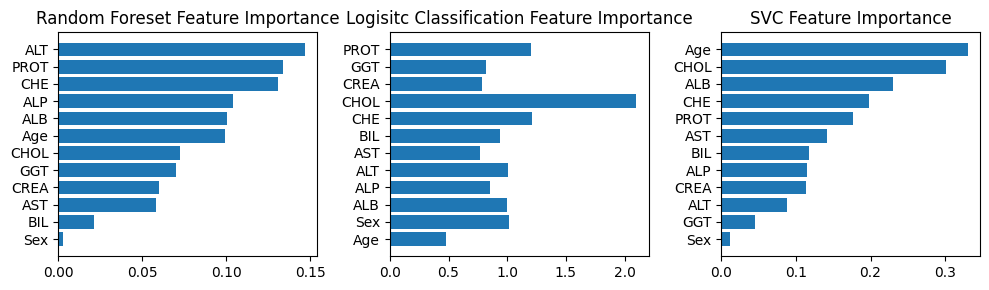


SVC Î™®Îç∏Ïù¥ Ïû¨ÌòÑÏú®, Ï†ïÎ∞ÄÎèÑ, Ï†ïÌôïÎèÑ, F1-scoreÏóêÏÑú Í∞ÅÍ∞Å 93%Î°ú Î™®Îç∏Ïùò ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÎã§. 
Î™®Îç∏Ïùò ÏÇ¨Ïö©Îêú Ïª¨ÎüºÎì§ ÏóêÎåÄÌïú Í≥ÑÏàòÎì§ÏùÑ ÌèâÍ∑† Í≥ÑÏàòÎ°ú Ï≤òÎ¶¨ÌïòÏó¨ Ï†ÑÏ≤¥ Ï§ëÏöîÎèÑÎ•º Ï†ïÎ¶¨Ìïú Í≤ΩÍ≥º 
Age, CHOL, ALB, CHE, PROT Í∞Ä Í∞ÑÏóºÏó¨Î∂ÄÏóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏÜåÎùºÍ≥† ÌåêÎã®ÎêòÏñ¥ÏßÑÎã§. 



In [21]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for name, model in model_lst :
  # Random Forest
  if name == 'rf' :
    importance = model.feature_importances_
    feature = model.feature_names_in_
    rf_imp = pd.Series(importance, feature).sort_values()

    axes[0].barh(rf_imp.index,  rf_imp.values)
    axes[0].set_title('Random Foreset Feature Importance')

  # Logistic
  elif name == 'LC' :
    odds = np.exp(model.coef_[0])
    feature = model.feature_names_in_
    lc_imp = pd.Series(odds, index = feature)

    axes[1].barh(lc_imp.index, lc_imp.values)
    axes[1].set_title('Logisitc Classification Feature Importance')

  # SVC : Í≥ÑÏàòÏùò ÌèâÍ∑†Ìôî
  else :
    importances = abs(model.coef_).mean(axis =0)
    features = model.feature_names_in_
    feature_imp = pd.Series(importances,features).sort_values()
    axes[2].barh(feature_imp.index, feature_imp.values)
    axes[2].set_title('SVC Feature Importance')


plt.tight_layout()
plt.show()
print('''
SVC Î™®Îç∏Ïù¥ Ïû¨ÌòÑÏú®, Ï†ïÎ∞ÄÎèÑ, Ï†ïÌôïÎèÑ, F1-scoreÏóêÏÑú Í∞ÅÍ∞Å 93%Î°ú Î™®Îç∏Ïùò ÏÑ±Îä•Ïù¥ Í∞ÄÏû• Ï¢ãÎã§.
Î™®Îç∏Ïùò ÏÇ¨Ïö©Îêú Ïª¨ÎüºÎì§ ÏóêÎåÄÌïú Í≥ÑÏàòÎì§ÏùÑ ÌèâÍ∑† Í≥ÑÏàòÎ°ú Ï≤òÎ¶¨ÌïòÏó¨ Ï†ÑÏ≤¥ Ï§ëÏöîÎèÑÎ•º Ï†ïÎ¶¨Ìïú Í≤ΩÍ≥º
Age, CHOL, ALB, CHE, PROT Í∞Ä Í∞ÑÏóºÏó¨Î∂ÄÏóê Ï§ëÏöîÌïú ÏòÅÌñ•ÏùÑ ÎØ∏ÏπòÎäî ÏöîÏÜåÎùºÍ≥† ÌåêÎã®ÎêòÏñ¥ÏßÑÎã§.
''')

## Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö
- Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò : https://www.data.go.kr/data/15048032/fileData.do / ÌõÑÏ≤òÎ¶¨, ÌÜµÍ≥ÑÏ≤≠ ÎÇ†Ïî®Ï†ïÎ≥¥
- Îç∞Ïù¥ÌÑ∞ ÎßÅÌÅ¨ :
    - ./data/p2_sb_2021.csv
    - ./data/p2_sb_2022.csv
    - ./data/p2_sb_2023.csv
    - ./data/p2_w_2021.csv
    - ./data/p2_w_2022.csv
    - ./data/p2_w_2023.csv
- Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö :
    - 21ÎÖÑ~23ÎÖÑÏùò JÏãúÏùò 2Í∞ú ÏßÄÌïòÏ≤†Ìò∏ÏÑ† ÏßÄÌïòÏ≤†Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ ÏäπÌïòÏ∞® Ïù∏Ïõê Ï†ïÎ≥¥ Îç∞Ïù¥ÌÑ∞ (p2_sb_ÎÖÑÎèÑ.csv)
        - X5~ X22 : 5ÏãúÎ∂ÄÌÑ∞ 22Ïãú ÏäπÏ∞® ÎòêÎäî ÌïòÏ∞® Ïù∏Ïõê, (X5 : 05ÏãúÏùò Í≥ÑÏ†à ÎÇ†ÏßúÏôÄ ÎåÄÏùë)
        - Ïó≠Î≤àÌò∏ : Í∞Å Ï†ïÎ•òÏû•Ïùò Í≥†Ïú† Î≤àÌò∏
        - ÏäπÌïòÏ∞®Íµ¨Î∂Ñ : ÏäπÏ∞® ÎòêÎäî ÌïòÏ∞®
    - 21ÎÖÑ~23ÎÖÑÏùò JÏãúÏùò ÌäπÏ†ïÏßÄÏó≠Íµ¨Ïùò ÏãúÍ∞ÑÎåÄÎ≥Ñ Í≤åÏ†àÏÑ± Ï†ïÎ≥¥ Îç∞Ïù¥ÌÑ∞ (p2_w_ÎÖÑÎèÑ.csv)
        - ÏãúÍ∞ÑÎ≥Ñ JÏãúÏùò ÎÇ†Ïî®Ï†ïÎ≥¥

In [22]:
p = pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_33·Ñí·Ö¨/p2_sb_2021.csv')
weather = pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_33·Ñí·Ö¨/p2_w_2021.csv')

import os
[x for x in os.listdir('/content/drive/MyDrive/ADP_SONY/ADP_33·Ñí·Ö¨/') if 'p2' in x]
sb = pd.concat([pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_33·Ñí·Ö¨/' + x) for x in [x for x in os.listdir('/content/drive/MyDrive/ADP_SONY/ADP_33·Ñí·Ö¨/') if 'p2_sb' in x]]).reset_index(drop=True)
w = pd.concat([pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_33·Ñí·Ö¨/' + x) for x in [x for x in os.listdir('/content/drive/MyDrive/ADP_SONY/ADP_33·Ñí·Ö¨/') if 'p2_w' in x]]).reset_index(drop=True)


#### ‚úÖ 4-1 ÏïÑÎûò Ï°∞Í±¥Îì§ÏùÑ Ï∞∏Í≥†ÌïòÏó¨ Ï†ÑÏ≤òÎ¶¨Î•º ÏãúÌñâÌïòÍ≥† ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Í∏∞Ï¥àÌÜµÍ≥ÑÎüâÏùÑ Íµ¨ÌïòÏãúÏò§
1. ÏäπÌïòÏ∞® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú X5~X22 Î™®Îì†Ïª¨ÎüºÏù¥ 0Ïùò Í∞íÏùÑ Í∞ÄÏßÄÎäî Í≤ΩÏö∞ Ìï¥Îãπ ÎÇ†Ïßú,Ìò∏ÏÑ†,Ïó≠Î≤àÌò∏ ÏäπÌïòÏ∞® ÌñâÏùÄ Ï†úÏô∏ÌïúÎã§.
2. ÏäπÌïòÏ∞® Îç∞Ïù¥ÌÑ∞Î•º ÎÇ†Ïßú,Ìò∏ÏÑ†,Ïó≠Î≤àÌò∏,ÏãúÍ∞ÑÎåÄÎ≥Ñ(05~22Ïãú) ÏäπÍ∞ùÏàòÏùò Ï¥ùÌï©ÏùÑ Íµ¨ÌïòÏó¨Îùº(ÏäπÏ∞® + ÌïòÏ∞®), Í≤∞Ï∏°ÏπòÎäî 0Î™ÖÏúºÎ°ú Í∞ÑÏ£ºÌïúÎã§. Ïª¨ÎüºÎ™ÖÏùÄ usersÎ°ú Î≥ÄÍ≤ΩÌïúÎã§.
3. ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞Ïùò Í∞ïÏàò Îç∞Ïù¥ÌÑ∞Îäî Í≤∞Ï∏°ÏπòÎ•º 0, Í∑∏ Ïô∏ Ïª¨ÎüºÏùò Í≤∞Ï∏°ÏπòÎäî ÏßÅÏ†ÑÍ∞íÏúºÎ°ú ÎåÄÏπòÌïúÎã§.
4. ÎÇ†ÏßúÎç∞Ïù¥ÌÑ∞ÏôÄ ÏùºÏûê,ÏãúÍ∞ÑÎ≥Ñ ÏäπÌïòÏ∞®Ïù∏Ïõê Îç∞Ïù¥ÌÑ∞Î•º ÎèôÏùºÎÇ†Ïßú,ÏãúÍ∞ÑÏóê ÎåÄÌï¥ Ìï©ÏπúÎã§.
5. ÏùºÏûêÏ†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú Ï£ºÎßê Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî weekdayÏª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌïúÎã§. (Ï£ºÎßê=1,ÌèâÏùº=0)
6. 21ÎÖÑ,22ÎÖÑ Îç∞Ïù¥ÌÑ∞Îäî ÌõàÎ†®Îç∞Ïù¥ÌÑ∞, 23ÎÖÑ Îç∞Ïù¥ÌÑ∞Îäî ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©ÌïúÎã§.

In [23]:
# ÏäπÌïòÏ∞® Îç∞Ïù¥ÌÑ∞ÏóêÏÑú X5~X22 Î™®Îì†Ïª¨ÎüºÏù¥ 0Ïùò Í∞íÏùÑ Í∞ÄÏßÄÎäî Í≤ΩÏö∞ Ìï¥Îãπ ÎÇ†Ïßú,Ìò∏ÏÑ†,Ïó≠Î≤àÌò∏ ÏäπÌïòÏ∞® ÌñâÏùÄ Ï†úÏô∏
sb['sum']= sb.iloc[:,4:].sum(axis = 1)
sb = sb[sb['sum'] != 0].reset_index(drop = True)
sb = sb.drop(columns = 'sum', axis = 1)
sb.head(3)

ÎÇ†Ïßú Ìò∏ÏÑ†  Ïó≠Î≤àÌò∏ ÏäπÌïòÏ∞®Íµ¨Î∂Ñ    X5  X6   X7   X8   X9  X10  ...  X13  X14  X15  \
0  2022-01-01  A  201    ÏäπÏ∞®  16.0  36   55  100   92   96  ...  268  287  389   
1  2022-01-01  A  201    ÌïòÏ∞®   9.0  88  196  209  150  136  ...  253  311  249   
2  2022-01-01  A  202    ÏäπÏ∞®  41.0  39   79  124  168  200  ...  607  752  796   

   X16   X17   X18  X19  X20   X21  X22  
0  443   424   385  240  358   359  115  
1  223   196   161   84  103   130   65  
2  977  1377  1200  922  985  1094  417  

[3 rows x 22 columns]

In [24]:
# ÏäπÌïòÏ∞® Îç∞Ïù¥ÌÑ∞Î•º ÎÇ†Ïßú,Ìò∏ÏÑ†,Ïó≠Î≤àÌò∏,ÏãúÍ∞ÑÎåÄÎ≥Ñ(05~22Ïãú) ÏäπÍ∞ùÏàòÏùò Ï¥ùÌï©ÏùÑ Íµ¨ÌïòÏó¨Îùº(ÏäπÏ∞® + ÌïòÏ∞®),
#Í≤∞Ï∏°ÏπòÎäî 0Î™ÖÏúºÎ°ú Í∞ÑÏ£ºÌïúÎã§. Ïª¨ÎüºÎ™ÖÏùÄ usersÎ°ú Î≥ÄÍ≤Ω

melt_df = sb.melt(id_vars = ['ÎÇ†Ïßú','Ìò∏ÏÑ†','Ïó≠Î≤àÌò∏','ÏäπÌïòÏ∞®Íµ¨Î∂Ñ'], var_name = 'ÏãúÍ∞Ñ', value_name = 'Ïù∏ÏõêÏàò')
melt_df.head(4)

ÎÇ†Ïßú Ìò∏ÏÑ†  Ïó≠Î≤àÌò∏ ÏäπÌïòÏ∞®Íµ¨Î∂Ñ  ÏãúÍ∞Ñ   Ïù∏ÏõêÏàò
0  2022-01-01  A  201    ÏäπÏ∞®  X5  16.0
1  2022-01-01  A  201    ÌïòÏ∞®  X5   9.0
2  2022-01-01  A  202    ÏäπÏ∞®  X5  41.0
3  2022-01-01  A  202    ÌïòÏ∞®  X5  38.0

In [25]:
sb_pivot = melt_df.pivot_table(index = ['ÎÇ†Ïßú','ÏãúÍ∞Ñ','Ìò∏ÏÑ†','Ïó≠Î≤àÌò∏'], columns = 'ÏäπÌïòÏ∞®Íµ¨Î∂Ñ',values = 'Ïù∏ÏõêÏàò' , aggfunc = 'sum').reset_index()
sb_pivot['users'] = sb_pivot['ÏäπÏ∞®'] +  sb_pivot['ÌïòÏ∞®']

#Í≤∞Ï∏°ÏπòÎäî 0Î™ÖÏúºÎ°ú Í∞ÑÏ£ºÌïúÎã§. Ïª¨ÎüºÎ™ÖÏùÄ usersÎ°ú Î≥ÄÍ≤Ω
sb_pivot['ÏäπÏ∞®'] = sb_pivot['ÏäπÏ∞®'].fillna(0)
sb_pivot['ÌïòÏ∞®'] = sb_pivot['ÌïòÏ∞®'].fillna(0)
sb_pivot['users'] = sb_pivot['users'].fillna(0)



In [26]:
# ÎÇ†Ïßú Îç∞Ïù¥ÌÑ∞Ïùò Í∞ïÏàò Îç∞Ïù¥ÌÑ∞Îäî Í≤∞Ï∏°ÏπòÎ•º 0, Í∑∏ Ïô∏ Ïª¨ÎüºÏùò Í≤∞Ï∏°ÏπòÎäî ÏßÅÏ†ÑÍ∞íÏúºÎ°ú ÎåÄÏπò
w['Í∞ïÏàòÎüâ']= w['Í∞ïÏàòÎüâ'].fillna(0)

for col in ['ÌíçÏÜç', 'Ï†ÑÏö¥Îüâ', 'ÏßÄÎ©¥Ïò®ÎèÑ']:
  w[col] = w[col].fillna(method = 'bfill')

w['ÏùºÏãú'] = pd.to_datetime(w['ÏùºÏãú'])

In [27]:
#ÎÇ†ÏßúÎç∞Ïù¥ÌÑ∞ÏôÄ ÏùºÏûê,ÏãúÍ∞ÑÎ≥Ñ ÏäπÌïòÏ∞®Ïù∏Ïõê Îç∞Ïù¥ÌÑ∞Î•º ÎèôÏùºÎÇ†Ïßú,ÏãúÍ∞ÑÏóê ÎåÄÌï¥ Ìï©ÏπúÎã§
sb_pivot['ÏùºÏãú']=  pd.to_datetime(sb_pivot['ÎÇ†Ïßú'] + ' '+sb_pivot['ÏãúÍ∞Ñ'].str.split('X').str[1])
merge_sb = sb_pivot[['ÏùºÏãú','Ìò∏ÏÑ†','Ïó≠Î≤àÌò∏','ÏäπÏ∞®','ÌïòÏ∞®','users']]

merge_df = pd.merge(merge_sb, w, on = 'ÏùºÏãú', how = 'left')
merge_df.head()

ÏùºÏãú Ìò∏ÏÑ†  Ïó≠Î≤àÌò∏     ÏäπÏ∞®     ÌïòÏ∞®  users   Í∏∞Ïò®  Í∞ïÏàòÎüâ   ÌíçÏÜç  ÏäµÎèÑ  Ï¶ùÍ∏∞Ïïï  \
0 2021-01-01 10:00:00  A  201   53.0  110.0  163.0 -6.1  0.0  1.1  68  2.6   
1 2021-01-01 10:00:00  A  202  103.0  356.0  459.0 -6.1  0.0  1.1  68  2.6   
2 2021-01-01 10:00:00  A  203   60.0  118.0  178.0 -6.1  0.0  1.1  68  2.6   
3 2021-01-01 10:00:00  A  204   57.0   99.0  156.0 -6.1  0.0  1.1  68  2.6   
4 2021-01-01 10:00:00  A  205  146.0  210.0  356.0 -6.1  0.0  1.1  68  2.6   

     ÌòÑÏßÄÍ∏∞Ïïï  Ï†ÑÏö¥Îüâ  Ï§ëÌïòÏ∏µÏö¥Îüâ  ÏßÄÎ©¥Ïò®ÎèÑ  
0  1016.4  1.0      1  -3.4  
1  1016.4  1.0      1  -3.4  
2  1016.4  1.0      1  -3.4  
3  1016.4  1.0      1  -3.4  
4  1016.4  1.0      1  -3.4

In [28]:
# ÏùºÏûêÏ†ïÎ≥¥Î•º Î∞îÌÉïÏúºÎ°ú Ï£ºÎßê Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî weekdayÏª¨ÎüºÏùÑ Ï∂îÍ∞ÄÌïúÎã§. (Ï£ºÎßê=1,ÌèâÏùº=0)
# dt.weekday : Monday=0, Sunday=6
merge_df['weekday'] = merge_df['ÏùºÏãú'].dt.weekday.apply(lambda x : 1 if x in [5,6] else 0)

In [29]:
# 21ÎÖÑ,22ÎÖÑ Îç∞Ïù¥ÌÑ∞Îäî ÌõàÎ†®Îç∞Ïù¥ÌÑ∞, 23ÎÖÑ Îç∞Ïù¥ÌÑ∞Îäî ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏÇ¨Ïö©
train_set = merge_df[merge_df['ÏùºÏãú'].dt.year.isin([2021, 2022])].reset_index(drop =True)
test_set = merge_df[merge_df['ÏùºÏãú'].dt.year.isin([2023])].reset_index(drop =True)

train_set.shape
test_set.shape

(545616, 16)

#### ‚úÖ 4-2 Ï†ÑÏ≤¥ ÎÖÑÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ usersÏôÄ ÎÇ†Ïî® Ï†ïÎ≥¥Ïóê ÎåÄÌï¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∂ÑÏÑùÌïòÍ≥† Ï£ºÎßêÏó¨Î∂ÄÏóê Îî∞Î•∏ users Î≥ÄÏàòÏùò Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌÜµÍ≥ÑÏ†ÅÏúºÎ°ú ÌôïÏù∏ÌïòÎùº.

In [30]:
#  usersÏôÄ ÎÇ†Ïî® Ï†ïÎ≥¥Ïóê ÎåÄÌï¥ ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Î∂ÑÏÑù
cor_df = merge_df.drop(columns =['ÏùºÏãú','Ìò∏ÏÑ†','Ïó≠Î≤àÌò∏', 'weekday','ÏäπÏ∞®','ÌïòÏ∞®'], axis = 1)
corr = cor_df.corr()
display(corr[corr.index == 'users'])
print('''
userÏôÄ ÎÇ†Ïî® Ï†ïÎ≥¥Ïóê ÎåÄÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º
ÏßÄÎ©¥Ïò®ÎèÑÏôÄ ÌíçÏÜçÍ≥º Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎ©∞, Í∞ïÏàòÎüâ, ÏäµÎèÑ, ÌòÑÏßÄ Í∏∞ÏóÖ, Ï†ÑÏö¥Îüâ, Ï§ëÌïòÏ∏µ Ïö¥ÎüâÍ≥ºÎäî ÏùåÏùò ÏÉÅÍ¥ÄÏùÑ Í∞ÄÏßÑÎã§.
ÎÇ†Ïî® Ï†ïÎ≥¥ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóêÏÑú 0.8Ïù¥ÏÉÅÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÏóÜÏñ¥ Îç∞Ïù¥ÌÑ∞ Ï§ëÎ≥µ(Îã§Ï§ë Í≥µÏÑ†ÏÑ±)Ïùò Ïö∞Î†§Í∞Ä ÎÇÆÎã§.
''')

users        Í∏∞Ïò®       Í∞ïÏàòÎüâ        ÌíçÏÜç        ÏäµÎèÑ       Ï¶ùÍ∏∞Ïïï      ÌòÑÏßÄÍ∏∞Ïïï  \
users    1.0  0.032292 -0.003306  0.049884 -0.051947  0.000272 -0.011956   

            Ï†ÑÏö¥Îüâ     Ï§ëÌïòÏ∏µÏö¥Îüâ      ÏßÄÎ©¥Ïò®ÎèÑ  
users -0.008724 -0.013331  0.023865


userÏôÄ ÎÇ†Ïî® Ï†ïÎ≥¥Ïóê ÎåÄÌïú ÏÉÅÍ¥ÄÍ¥ÄÍ≥Ñ Î∂ÑÏÑù Í≤∞Í≥º 
ÏßÄÎ©¥Ïò®ÎèÑÏôÄ ÌíçÏÜçÍ≥º Í∞ïÌïú ÏñëÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Í∞ÄÏßÄÎ©∞, Í∞ïÏàòÎüâ, ÏäµÎèÑ, ÌòÑÏßÄ Í∏∞ÏóÖ, Ï†ÑÏö¥Îüâ, Ï§ëÌïòÏ∏µ Ïö¥ÎüâÍ≥ºÎäî ÏùåÏùò ÏÉÅÍ¥ÄÏùÑ Í∞ÄÏßÑÎã§. 
ÎÇ†Ïî® Ï†ïÎ≥¥ÏôÄÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÏóêÏÑú 0.8Ïù¥ÏÉÅÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàòÍ∞Ä ÏóÜÏñ¥ Îç∞Ïù¥ÌÑ∞ Ï§ëÎ≥µ(Îã§Ï§ë Í≥µÏÑ†ÏÑ±)Ïùò Ïö∞Î†§Í∞Ä ÎÇÆÎã§. 



In [31]:
# Ï£ºÎßêÏó¨Î∂ÄÏóê Îî∞Î•∏ users Î≥ÄÏàòÏùò Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨
from scipy.stats import ttest_ind
stat_df = merge_df[['weekday','users']]

g1 = stat_df[stat_df['weekday']== 1]['users']
g2 = stat_df[stat_df['weekday']== 0]['users']

stat, p_val = ttest_ind(g1, g2)
print(f'''
Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ï£ºÎßê Ïó¨Î∂ÄÏóê Îî∞Î•∏ usersÏùò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§.
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ï£ºÎßê Ïó¨Î∂ÄÏóê Îî∞Î•∏ usersÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§.
{p_val} < 0.05 ÏúºÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏó¨, Ï£ºÎßê Ïó¨Î∂ÄÏóê Îî∞Î•∏ usersÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§.
''')


Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Ï£ºÎßê Ïó¨Î∂ÄÏóê Îî∞Î•∏ usersÏùò Ï∞®Ïù¥Í∞Ä ÏóÜÎã§. 
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Ï£ºÎßê Ïó¨Î∂ÄÏóê Îî∞Î•∏ usersÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§. 
0.0 < 0.05 ÏúºÎ°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏó¨, Ï£ºÎßê Ïó¨Î∂ÄÏóê Îî∞Î•∏ usersÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎã§. 



#### ‚úÖ 4-3 usersÎ•º ÏòàÏ∏°ÌïòÎäî 2Í∞ÄÏßÄ ÌöåÍ∑ÄÎ™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ≥† Î™®Îç∏Ïóê ÎåÄÌï¥ ÌèâÍ∞ÄÌïòÎùº (ÏÑ†ÌòïÌöåÍ∑Ä Î™®Îç∏ÏùÄ 1Í∞ú ÌïÑÏàò Ìè¨Ìï®)

In [32]:
x_train = train_set.drop(columns = ['ÏùºÏãú','users','Ïó≠Î≤àÌò∏'])
y_train = train_set['users']

train_dummies = pd.get_dummies(x_train['Ìò∏ÏÑ†'], dtype = int)
scaled_x = x_train.drop(columns = ['weekday','Ìò∏ÏÑ†'])
ss = StandardScaler()
scaled_x = pd.DataFrame(ss.fit_transform(scaled_x), columns = scaled_x.columns)
## X_train, y_train
final_x_train = pd.concat([scaled_x, train_dummies], axis = 1)
y_train = train_set['users']


x_test = test_set.drop(columns = ['ÏùºÏãú','users','Ïó≠Î≤àÌò∏'])
test_dummies = pd.get_dummies(x_test['Ìò∏ÏÑ†'], dtype = int)
scaled_x_test = x_test.drop(columns = ['weekday','Ìò∏ÏÑ†'])
ss = StandardScaler()
scaled_x_test = pd.DataFrame(ss.fit_transform(scaled_x_test), columns = scaled_x.columns)

# X_test , y_test
final_x_test = pd.concat([scaled_x, test_dummies], axis = 1)
y_test = test_set['users']



In [32]:
print('''
ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Ïù∏ Linear RegressionÍ≥º ÎπÑÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Ïù∏ Random Forest RegressorÎ•º ÏÇ¨Ïö©ÌïòÏó¨ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïúÎã§.

1) Linear Regression
- ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàò Í∞ÑÏùò ÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Í∞ÄÏ†ïÌïòÎäî Í∞ÄÏû• Í∏∞Î≥∏Ï†ÅÏù∏ ÌöåÍ∑Ä Î™®Îç∏Ïù¥Îã§.
- Î™®Îç∏Ïù¥ Îã®ÏàúÌïòÍ≥† Ìï¥ÏÑùÎ†•Ïù¥ Îõ∞Ïñ¥ÎÇòÎØÄÎ°ú, Î≥ÄÏàò Í∞Ñ Í¥ÄÍ≥Ñ ÌååÏïÖÍ≥º Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏÑ±Îä• Ï∏°Ï†ïÏóê Ïú†Ïö©ÌïòÎã§.
- Îã§Îßå, Î≥ÄÏàò Í∞Ñ ÏÑ†ÌòïÏÑ± Í∞ÄÏ†ïÏù¥ ÎßåÏ°±ÎêòÏßÄ ÏïäÍ±∞ÎÇò ÏÉÅÌò∏ÏûëÏö©Ïù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ΩÏö∞ÏóêÎäî ÏÑ±Îä•Ïù¥ Ï†úÌïúÎê† Ïàò ÏûàÎã§.

2) Random Forest Regressor
- Ïó¨Îü¨ Í∞úÏùò Í≤∞Ï†ï Ìä∏Î¶¨Î•º ÏïôÏÉÅÎ∏îÌïòÏó¨ ÏòàÏ∏°ÏùÑ ÏàòÌñâÌïòÎäî ÎπÑÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏Ïù¥Îã§.
- Î≥ÄÏàò Í∞Ñ Î≥µÏû°Ìïú ÎπÑÏÑ†Ìòï Í¥ÄÍ≥ÑÎ•º Ïûò Ìè¨Ï∞©ÌïòÎ©∞, Í≥ºÏ†ÅÌï©ÏóêÎèÑ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Í∞ïÍ±¥Ìïú ÌäπÏÑ±ÏùÑ Í∞ÄÏßÑÎã§.
- Î≥ÄÏàò Ï§ëÏöîÎèÑÎ•º ÏûêÎèôÏúºÎ°ú Ï∂îÏ∂úÌï† Ïàò ÏûàÏñ¥, ÏòàÏ∏°Îøê ÏïÑÎãàÎùº Î≥ÄÏàò Ìï¥ÏÑùÏóêÎèÑ ÌôúÏö© Í∞ÄÎä•ÌïòÎã§.

üìå Îëê Î™®Îç∏ÏùÑ ÎπÑÍµêÌï®ÏúºÎ°úÏç®, Îç∞Ïù¥ÌÑ∞Í∞Ä ÏÑ†ÌòïÏ†ÅÏù∏ Íµ¨Ï°∞Î•º Í∞ÄÏßÄÎäîÏßÄ ÎòêÎäî ÎπÑÏÑ†ÌòïÏ†Å ÌäπÏÑ±Ïù¥ Í∞ïÌïúÏßÄÎ•º ÌåêÎã®Ìï† Ïàò ÏûàÏúºÎ©∞,
Ìï¥ÏÑùÎ†•Í≥º ÏòàÏ∏°Î†• Í∞ÑÏùò Í∑†ÌòïÏùÑ Í≥†Î†§Ìïú Î™®Îç∏ ÏÑ†ÌÉùÏù¥ Í∞ÄÎä•ÌïòÎã§.
''')

def eval_model(name, model) :
  model.fit(final_x_train, y_train)
  pred = model.predict(final_x_test)
  mse = mean_squared_error(y_test, pred )
  r2 = r2_score(y_test, pred)

  return mse, r2

res = []
model_lst= []
for name, model in [['rf' , RandomForestRegressor()] , ['LC', LinearRegression()]] :
  mse, r2 = eval_model(name, model)
  res.append([name, mse, r2])
  model_lst.append([name, model])


linear_result = pd.DataFrame(res, columns = ['Model_Name', 'MSE', 'r2'])
display(linear_result)

#### üìä ÌÜµÍ≥Ñ (40Ï†ê)

## Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö
- Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò : ÏûêÏ≤¥ Ï†úÏûë
- Îç∞Ïù¥ÌÑ∞ ÎßÅÌÅ¨ : ./data/s1.csv
- Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö : A,B Îëê Í≥µÏû•Ïùò ÌäπÏ†ï ÏùºÏûêÏùò ÏàòÏú®(%)Îç∞Ïù¥ÌÑ∞. Îã®, Î∂àÎüâÎ•†ÏùÄ (100 - ÏàòÏú®)Î°ú Ï†ïÏùòÌïúÎã§.
    

In [33]:
df = pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_33·Ñí·Ö¨/s1.csv')
df.head()

year month  day      A     B
0  2023   Sep    7   56.9  42.3
1  2023   Feb   20  100.0  89.0
2  2023   Jun   15   19.3  59.0
3  2023   Apr   11   98.0  84.8
4  2023   Jul    8   89.5  63.8

## 5-1 Í≥µÏû•Î≥Ñ Í≤∞Ï∏°Ïπò, Í∏∞Ï¥àÌÜµÍ≥ÑÎüâ Îì±ÏùÑ ÌôïÏù∏ÌïòÎùº

year     0
month    0
day      0
A        5
B        5
dtype: int64


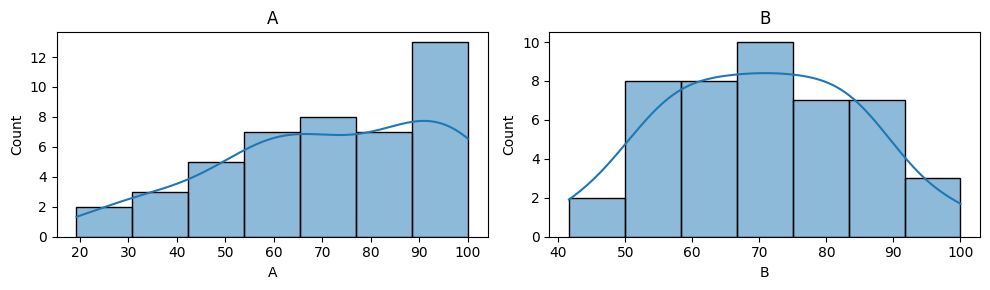

count       mean        std   min   25%   50%   75%    max
A   45.0  72.064444  22.892805  19.3  57.2  72.1  89.6  100.0
B   45.0  70.306667  14.352865  41.6  59.0  70.7  81.7  100.0


AÍ≥µÏû•Ïùò Í≤ΩÏö∞, Ïò§Î•∏Ï°±ÏúºÎ°ú Ï†êÏ†ê Ï¶ùÍ∞ÄÌïòÎäî Î∂ÑÌè¨Î•º ÎùÑÎ©∞, BÏùò Í≤ΩÏö∞ Ï¢Ö Î™®ÏñëÏùò Î∂ÑÌè¨Î•º Í∞ÄÏßÑÎã§. 
A Í≥µÏû•Ïùò ÌèâÍ∑†Ïù¥ 72Î°ú BÍ≥µÏû•Î≥¥Îã§ Îã§ÏÜå ÎÜíÏúºÎ©∞, ÌëúÏ§ÄÌé∏Ï∞®ÏóêÏÑú Ï∞®Ïù¥Í∞Ä ÎÇòÏßÄÎßå, ÎààÏóê ÎùÑÎäî Ï†êÏùÄ 
ÏµúÍ≥† Í∞íÏù¥ AÍ≥µÏû• 20, BÍ≥µÏû•Ïù¥ 41Î°ú BÍ≥µÏû•Ïùò ÏàòÏú®Ïùò ÏµúÏÜå 40% Ïù¥ÏÉÅÏù¥ÎùºÎäî Ï†êÏù¥ ÌäπÏßïÏù¥Îã§.



In [34]:
print(df.isna().sum())

fig, axes = plt.subplots(1, 2, figsize = (10,3))
for  i, col in enumerate(['A','B']) :
  sns.histplot(df[col], ax = axes[i], kde= True)
  axes[i].set_title(col)

plt.tight_layout()
plt.show()
display(df[['A','B']].describe().T)
print('''
AÍ≥µÏû•Ïùò Í≤ΩÏö∞, Ïò§Î•∏Ï°±ÏúºÎ°ú Ï†êÏ†ê Ï¶ùÍ∞ÄÌïòÎäî Î∂ÑÌè¨Î•º ÎùÑÎ©∞, BÏùò Í≤ΩÏö∞ Ï¢Ö Î™®ÏñëÏùò Î∂ÑÌè¨Î•º Í∞ÄÏßÑÎã§.
A Í≥µÏû•Ïùò ÌèâÍ∑†Ïù¥ 72Î°ú BÍ≥µÏû•Î≥¥Îã§ Îã§ÏÜå ÎÜíÏúºÎ©∞, ÌëúÏ§ÄÌé∏Ï∞®ÏóêÏÑú Ï∞®Ïù¥Í∞Ä ÎÇòÏßÄÎßå, ÎààÏóê ÎùÑÎäî Ï†êÏùÄ
ÏµúÍ≥† Í∞íÏù¥ AÍ≥µÏû• 20, BÍ≥µÏû•Ïù¥ 41Î°ú BÍ≥µÏû•Ïùò ÏàòÏú®Ïùò ÏµúÏÜå 40% Ïù¥ÏÉÅÏù¥ÎùºÎäî Ï†êÏù¥ ÌäπÏßïÏù¥Îã§.
''')

## 5-2 A,B Í≥µÏû•Ïùò Î∂àÎüâÎ•† Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÎ†§ ÌïúÎã§. Í∑ÄÎ¨¥,ÎåÄÎ¶Ω Í∞ÄÏÑ§ÏùÑ ÏÑ§Ï†ïÌïòÍ≥† ÏÑ§Î™ÖÌïòÎùº

In [35]:
# Îç∞Ïù¥ÌÑ∞Í∞Ä 50Í∞ú - Ï†ïÍ∑úÏÑ±, Îì±Î∂ÑÏÇ∞ÏÑ±

# A, B Í≤∞Ï∏° ÌèâÍ∑† ÎåÄÏ≤¥
df['A'] = df['A'].fillna(df['A'].mean())
df['B'] = df['B'].fillna(df['B'].mean())

# Ï†ïÍ∑úÏÑ± Í≤ÄÌÜ†
A = df['A']
B = df['B']

a_stat, a_pval = stats.shapiro(A)
b_stat, b_pval = stats.shapiro(B)
print(f'''
Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Îäî Ï†ïÍ∑ú Î∂ÑÌè¨Ïù¥Îã§.
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Îäî Ï†ïÍ∑ú Î∂ÑÌè¨Í∞Ä ÏïÑÎãàÎã§.

A Í≥µÏû• : {a_pval} < 0.05
B Í≥µÏû• : {b_pval} > 0.05
ÏúºÎ°ú AÍ≥µÏû•Ïùò Îç∞Ïù¥ÌÑ∞Îäî Ï†ïÍ∑ú Î∂ÑÌè¨Í∞Ä ÏïÑÎãàÎã§.
ÎπÑÎ™®Ïàò Í≤ÄÏ†ïÏù∏ wilcoxÏúºÎ°ú Îëê ÏßëÎã®Ïùò Ï∞®Ïù¥Î•º Í≤ÄÏ†ïÌïúÎã§.
''')

from scipy.stats import mannwhitneyu
stat, p_val = mannwhitneyu(A, B, alternative='two-sided')



print(f'''
Í∑ÄÎ¨¥Í∞ÄÏÑ§ : A,BÍ≥µÏû•Ïùò Î∂àÎüâÎ•† Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§.
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : A,BÍ≥µÏû•Ïùò Î∂àÎüâÎ•† Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïúÎã§.
p_val Í∞Ä {p_val} > 0.05ÏúºÎ°ú  A,BÍ≥µÏû•Ïùò Î∂àÎüâÎ•† Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§.
''')



Í∑ÄÎ¨¥Í∞ÄÏÑ§ : Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Îäî Ï†ïÍ∑ú Î∂ÑÌè¨Ïù¥Îã§.
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Îäî Ï†ïÍ∑ú Î∂ÑÌè¨Í∞Ä ÏïÑÎãàÎã§. 

A Í≥µÏû• : 0.015296006567744753 < 0.05
B Í≥µÏû• : 0.8072348628390171 > 0.05 
ÏúºÎ°ú AÍ≥µÏû•Ïùò Îç∞Ïù¥ÌÑ∞Îäî Ï†ïÍ∑ú Î∂ÑÌè¨Í∞Ä ÏïÑÎãàÎã§. 
ÎπÑÎ™®Ïàò Í≤ÄÏ†ïÏù∏ wilcoxÏúºÎ°ú Îëê ÏßëÎã®Ïùò Ï∞®Ïù¥Î•º Í≤ÄÏ†ïÌïúÎã§. 


Í∑ÄÎ¨¥Í∞ÄÏÑ§ : A,BÍ≥µÏû•Ïùò Î∂àÎüâÎ•† Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§. 
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : A,BÍ≥µÏû•Ïùò Î∂àÎüâÎ•† Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïúÎã§. 
p_val Í∞Ä 0.377411102998617 > 0.05ÏúºÎ°ú  A,BÍ≥µÏû•Ïùò Î∂àÎüâÎ•† Ï∞®Ïù¥Í∞Ä Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäîÎã§. 



## 5-3 A,BÏùò Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌÜµÍ≥ÑÍ≤ÄÏ†ï ÌïòÍ≥† ÏÑ§Î™ÖÌïòÎùº

## Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö
- Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò : https://www.data.go.kr/data/15123586/fileData.do ÌõÑÏ≤òÎ¶¨
- Îç∞Ïù¥ÌÑ∞ ÎßÅÌÅ¨ : ./data/s2.csv
- Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö : ÏùºÏûêÎ≥Ñ ÏßÄÌïòÏ≤† ÎÖ∏ÏÖòÎ≥Ñ ÏßÄÏó∞ Îç∞Ïù¥ÌÑ∞

In [36]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_33·Ñí·Ö¨/s2.csv')
df.head()

ÏßÄÏó∞ID        ÏßÄÏó∞ÏùºÏûê   ÎÖ∏ÏÑ† ÏµúÎåÄÏßÄÏó∞ÏãúÍ∞Ñ
0  ID_0  2023-09-01  1Ìò∏ÏÑ†    15Î∂Ñ
1  ID_1  2023-09-01  1Ìò∏ÏÑ†    15Î∂Ñ
2  ID_2  2023-09-01  4Ìò∏ÏÑ†    10Î∂Ñ
3  ID_3  2023-09-01  4Ìò∏ÏÑ†    10Î∂Ñ
4  ID_4  2023-09-04  4Ìò∏ÏÑ†    10Î∂Ñ

In [37]:
df['ÏµúÎåÄÏßÄÏó∞ÏãúÍ∞Ñ'] = df['ÏµúÎåÄÏßÄÏó∞ÏãúÍ∞Ñ'].str.split('Î∂Ñ').str[0].astype(int)

## 6-1 ÎÖ∏ÏÑ†Ïóê ÏÉÅÍ¥ÄÏóÜÏù¥ ÏùºÎ≥Ñ ÏµúÎåÄ ÏßÄÏó∞ÏãúÍ∞ÑÏù¥ 5~15Î∂ÑÏúºÎ°ú Î∞úÏÉùÌïòÎäî Í≤ΩÏö∞Îäî ÌïòÎÇòÏùò ÏÇ¨Í±¥ÏúºÎ°ú Î≥¥Ïûê. Ìï¥Îãπ ÏÇ¨Í±¥Ïù¥ ÏùºÏûêÎ≥Ñ Î∞úÏÉùÌïòÎäî ÎπàÎèÑÍ∞Ä Ìë∏ÏïÑÏÜ°Î∂ÑÌè¨Î•º Îî∞Î•¥ÎäîÏßÄ ÌôïÏù∏ÌïòÎäî Î∞©Î≤ï 2Í∞ÄÏßÄÎ•º Í∏∞Ïà†ÌïòÍ≥† Í≤∞Í≥ºÎ•º Î≥¥Ïó¨Îùº

In [38]:
#df['ÏµúÎåÄÏßÄÏó∞ÏãúÍ∞Ñ'].value_counts()

# ÌèâÍ∑† ÏßÄÏó∞ ÏãúÍ∞Ñ
mean = np.mean(df['ÏµúÎåÄÏßÄÏó∞ÏãúÍ∞Ñ'])

# Í∞Å ÏßÄÏó∞ ÏãúÍ∞ÑÏùò Í¥ÄÏ∏° ÎπàÎèÑ
obs_freq = df['ÏµúÎåÄÏßÄÏó∞ÏãúÍ∞Ñ'].value_counts().sort_index()

# Í∏∞ÎåÄÎπàÎèÑ - Í∞Å ÏßÄÏó∞ ÏãúÍ∞Ñ ÎßàÎã§Ïùò Ìè¨ÏïÑÏÜ°Ïùò Í∏∞ÎåÄÎπàÎèÑ
poisson_prob = [stats.poisson.pmf(k, mean) for k in obs_freq.index]

expected_freq = np.array(poisson_prob) * obs_freq.sum()

# Í∏∞ÎåÄÎπàÎèÑ Ìï©
expected = expected_freq * (obs_freq.sum() / expected_freq.sum())

chi2_stat, p_value = stats.chisquare(f_obs = obs_freq.values, f_exp = expected)
print(f"Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: {chi2_stat}")
print(f"p-value: {p_value}")

# Í≤∞Í≥º Ìï¥ÏÑù
alpha = 0.05
if p_value < alpha:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: ÏßÄÏó∞ ÏãúÍ∞ÑÏùÄ Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.")
else:
    print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù: ÏßÄÏó∞ ÏãúÍ∞ÑÏùÄ Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨Î•º Îî∞Î•∏Îã§.")

Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ: 29617.649538464797
p-value: 0.0
Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: ÏßÄÏó∞ ÏãúÍ∞ÑÏùÄ Ìè¨ÏïÑÏÜ° Î∂ÑÌè¨Î•º Îî∞Î•¥ÏßÄ ÏïäÎäîÎã§.


## 6-2 10Î∂ÑÏù¥Ìïò, 10Î∂ÑÏ¥àÍ≥º -20Î∂Ñ Ïù¥Ìïò, 20Î∂ÑÏ¥àÍ≥º  3Í∞ÄÏßÄÎ°ú ÏßÄÏó∞ÏãúÍ∞ÑÏùÑ ÏßÄÏó∞Ï†ïÎèÑÎ°ú Î∂ÑÎ•òÌïòÎùº. Ìò∏ÏÑ†Î≥Ñ ÏßÄÏó∞Ï†ïÎèÑÎ•º ÍµêÏ∞®ÌëúÎ°ú Íµ¨ÌïòÏó¨Îùº

In [39]:
def delay(x) :
  if x <= 10 :
    return '10Î∂ÑÏù¥Ìïò'
  elif x <= 20 :
    return '10Î∂ÑÏ¥àÍ≥º_20Î∂ÑÏù¥Ìïò'
  else :
    return '20Î∂ÑÏ¥àÍ≥º'

df['ÏßÄÏó∞Ï†ïÎèÑ'] = df['ÏµúÎåÄÏßÄÏó∞ÏãúÍ∞Ñ'].apply(delay)

## 6-3 ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Î≥ÑÎ°ú ÏßÄÏó∞Ï†ïÎèÑÍ∞Ä Ï∞®Ïù¥Í∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏ÌïòÎ†§ÌïúÎã§. Í∑ÄÎ¨¥Í∞ÄÏÑ§Í≥º ÎåÄÎ¶ΩÍ∞ÄÏÑ§ÏùÑ ÏÑ§Ï†ïÌïú ÌõÑ ÌÜµÍ≥Ñ Í≤ÄÏ†ïÏùÑ Ïã§ÏãúÌïòÎùº

In [40]:
chi_df = pd.crosstab(df['ÎÖ∏ÏÑ†'],df['ÏßÄÏó∞Ï†ïÎèÑ'])

stat, p_val, dof, expected = stats.chi2_contingency(chi_df)
print(f'''
Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Î≥ÑÎ°ú ÏßÄÏó∞Ï†ïÎèÑÎäî ÎèÖÎ¶ΩÏù¥Îã§.
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Î≥ÑÎ°ú ÏßÄÏó∞Ï†ïÎèÑÎäî ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎã§.

{p_val} < 0.05Î°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏó¨, ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Î≥ÑÎ°ú ÏßÄÏó∞Ï†ïÎèÑÎäî ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎã§.
Ï¶â, ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Î≥ÑÎ°ú ÏßÄÏó∞Ï†ïÎèÑÏùò Î∂ÑÌè¨Í∞Ä Îã¨ÎùºÏßÑÎã§.
''')


Í∑ÄÎ¨¥Í∞ÄÏÑ§ : ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Î≥ÑÎ°ú ÏßÄÏó∞Ï†ïÎèÑÎäî ÎèÖÎ¶ΩÏù¥Îã§. 
ÎåÄÎ¶ΩÍ∞ÄÏÑ§ : ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Î≥ÑÎ°ú ÏßÄÏó∞Ï†ïÎèÑÎäî ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎã§. 

0.0009748725028849682 < 0.05Î°ú Í∑ÄÎ¨¥Í∞ÄÏÑ§ÏùÑ Í∏∞Í∞ÅÌïòÏó¨, ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Î≥ÑÎ°ú ÏßÄÏó∞Ï†ïÎèÑÎäî ÎèÖÎ¶ΩÏù¥ ÏïÑÎãàÎã§. 
Ï¶â, ÏßÄÌïòÏ≤† Ìò∏ÏÑ†Î≥ÑÎ°ú ÏßÄÏó∞Ï†ïÎèÑÏùò Î∂ÑÌè¨Í∞Ä Îã¨ÎùºÏßÑÎã§.



## Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö
- Îç∞Ïù¥ÌÑ∞ Ï∂úÏ≤ò : ÏûêÏ≤¥Ï†úÏûë
- Îç∞Ïù¥ÌÑ∞ ÎßÅÌÅ¨ : ./data/s3.csv
- Îç∞Ïù¥ÌÑ∞ ÏÑ§Î™Ö : ÏãúÍ≥ÑÏó¥ Ï†ïÎ≥¥Î•º Í∞ÄÏßÄÎäî 250ÌñâÏùò Îç∞Ïù¥ÌÑ∞

In [41]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ADP_SONY/ADP_33·Ñí·Ö¨/s3.csv')
df.columns = ['value']
df.head()

value
0  0.308778
1  0.692133
2  2.070861
3  1.326845
4  0.077552

## 7-1 ar ma armaÏóê ÎåÄÌï¥ ÏÑ§Î™ÖÌïòÍ≥†, ACF, PACFÎäî Ìå®ÌÑ¥ÏùÑ ÌÜµÌï¥ ÏÑ§Î™ÖÌïòÎùº.


AR (ÏûêÍ∏∞ ÌöåÍ∑Ä Î™®Ìòï)
  - ÌòÑÏû¨ ÏãúÏ†êÏùò Í∞íÏù¥ Í≥ºÍ±∞ Í∞íÏùò ÏÑ†Ìòï Í≤∞Ìï©ÏúºÎ°ú ÏÑ§Î™ÖÎêòÎäî Î™®Îç∏ 
  - Ï¶â, Í≥ºÍ±∞Ïùò Îç∞Ïù¥ÌÑ∞Ïùò ÏòÅÌñ•ÏùÑ Î∞òÏòÅ 

MA (Ïù¥Îèô ÌèâÍ∑† Î™®Ìòï)
  - ÌòÑÏû¨ ÏãúÏ†êÏùò Í∞íÏù¥ Í≥ºÍ±∞Ïùò Ïò§Ï∞®Ìï≠Ïùò ÏÑ†Ìòï Í≤∞Ìï©ÏúºÎ°ú ÏÑ§Î™ÖÎêòÎäî Î™®Îç∏ 

ARMA - ARÍ≥º MAÎ•º Í≤∞Ìï©Ìïú Î™®ÌòïÏúºÎ°ú Í≥ºÍ±∞Í∞íÍ≥º Ïò§Ï∞®Ïùò ÏòÅÌñ•ÏùÑ Î∞õÎäî Í≤ÉÏùÑ Î∞òÏòÅÌïú Î™®Ìòï 
     - ÎåÄÎ∂ÄÎ∂ÑÏùò Ï†ïÏÉÅ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îäî ARMA Î™®Îç∏Î°ú Ï†ÅÏ†àÌûà ÏÑ§Î™ÖÏù¥ Í∞ÄÎä•



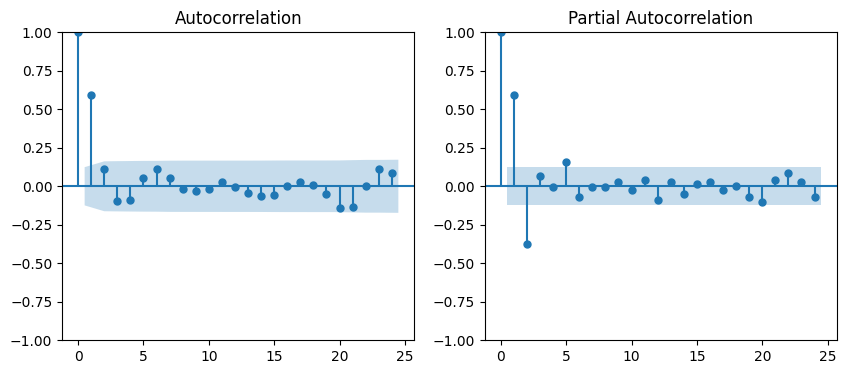

In [42]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

print('''
AR (ÏûêÍ∏∞ ÌöåÍ∑Ä Î™®Ìòï)
  - ÌòÑÏû¨ ÏãúÏ†êÏùò Í∞íÏù¥ Í≥ºÍ±∞ Í∞íÏùò ÏÑ†Ìòï Í≤∞Ìï©ÏúºÎ°ú ÏÑ§Î™ÖÎêòÎäî Î™®Îç∏
  - Ï¶â, Í≥ºÍ±∞Ïùò Îç∞Ïù¥ÌÑ∞Ïùò ÏòÅÌñ•ÏùÑ Î∞òÏòÅ

MA (Ïù¥Îèô ÌèâÍ∑† Î™®Ìòï)
  - ÌòÑÏû¨ ÏãúÏ†êÏùò Í∞íÏù¥ Í≥ºÍ±∞Ïùò Ïò§Ï∞®Ìï≠Ïùò ÏÑ†Ìòï Í≤∞Ìï©ÏúºÎ°ú ÏÑ§Î™ÖÎêòÎäî Î™®Îç∏

ARMA - ARÍ≥º MAÎ•º Í≤∞Ìï©Ìïú Î™®ÌòïÏúºÎ°ú Í≥ºÍ±∞Í∞íÍ≥º Ïò§Ï∞®Ïùò ÏòÅÌñ•ÏùÑ Î∞õÎäî Í≤ÉÏùÑ Î∞òÏòÅÌïú Î™®Ìòï
     - ÎåÄÎ∂ÄÎ∂ÑÏùò Ï†ïÏÉÅ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Îäî ARMA Î™®Îç∏Î°ú Ï†ÅÏ†àÌûà ÏÑ§Î™ÖÏù¥ Í∞ÄÎä•
''')

fig, ax = plt.subplots(1,2, figsize = (10, 4))
plot_acf(df, ax = ax[0])
plot_pacf(df, ax = ax[1])
plt.show()

## 7-2 Acf pacfÎ•º Í∑∏Î¶¨Í≥† Ìï¥ÏÑùÌïòÎùº, Ìï¥Îãπ Plot dataÎ•º Í∏∞Î∞òÏúºÎ°ú ARMA(p,q)Î™®Ìòï Ï†úÏãúÌïòÎùº

In [1]:
print('''
1) ACF (MA): ÌòÑÏû¨Í∞íÍ≥º Í≥ºÍ±∞Í∞íÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Ï∏°Ï†ï - Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ Íµ¨Ï°∞ÏóêÏÑú lag kÍ∞Ä ÏñºÎßàÎÇò Ï§ëÏöîÌïúÏßÄ ÎÇòÌÉÄÎÉÑ
        ÏãúÏ∞® 0ÏóêÏÑú ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî 1 (ÏûêÍ∏∞ ÏûêÏã†Í≥ºÏùò ÏÉÅÍ¥Ä)
        ÏãúÏ∞® 1ÏóêÏÑú ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.6ÏúºÎ°ú Ïú†ÏùòÎØ∏
        ÏãúÏ∞® 2ÏóêÏÑúÎ∂ÄÌÑ∞ ÌååÎûÄÏÉâ ÏòÅÏó≠ÏúºÎ°ú Îì§Ïñ¥Í∞ÄÎ©∞ 0 Í∑ºÏ≤òÏóêÏÑú Î≥ÄÎèô Ï¶â, ÏãúÏ∞® 1Ïù¥ÌõÑÏóê ÏÉÅÍ¥ÄÏù¥ Ïú†ÏùòÌïòÏßÄ ÏïäÏùå
        MA(1) Î™®Ìòï

2) PCAF (AR): ÌòÑÏû¨ÏôÄ ÌäπÏßï lag ÎßåÏùò Í¥ÄÍ≥Ñ Ï¶â, LagÏûêÏ≤¥Í∞Ä ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú ÏñºÎßàÎÇò Ï§ëÏöîÌïúÍ∞ÄÎ•º ÎÇòÌÉÄÎÉÑ
        ÏãúÏ∞® 0ÏóêÏÑú Î∂ÄÎ∂Ñ ÏûêÍ∏∞ ÏÉÅÍ¥ÄÍ≥ÑÏàò 1
        ÏãúÏ∞® 1ÏóêÏÑú 0.75Î°ú Ïú†ÏùòÎØ∏
        ÏãúÏ∞® 2ÏóêÏÑú -0.25ÏúºÎ°ú Ïã†Î¢∞Íµ¨Í∞Ñ Î∞ñÏóê ÏûàÏßÄÎßå ÏãúÏ∞® 3Î∂ÄÌÑ∞ Ïã†Î¢∞Íµ¨Í∞ÑÎÇ¥Î°ú Îì§Ïñ¥Í∞ê
        AR(1) ÌòπÏùÄ AR(2)

PACFÏùò ÏãúÏ∞® 2Ïù¥ÌõÑ Ìå®ÌÑ¥Ïù¥ ÏïΩÌï®ÏúºÎ°ú, AR(1)ÏùÑ Í≥†Î†§ÌïòÎ©∞ ARMA(1,1) Ïù¥ Ï†ÅÌï©Ìï¥Î≥¥Ïù∏Îã§.
''')



1) ACF (MA): ÌòÑÏû¨Í∞íÍ≥º Í≥ºÍ±∞Í∞íÏùò ÏÉÅÍ¥ÄÍ¥ÄÍ≥ÑÎ•º Ï∏°Ï†ï - Ï†ÑÏ≤¥ ÏãúÍ≥ÑÏó¥ Íµ¨Ï°∞ÏóêÏÑú lag kÍ∞Ä ÏñºÎßàÎÇò Ï§ëÏöîÌïúÏßÄ ÎÇòÌÉÄÎÉÑ
        ÏãúÏ∞® 0ÏóêÏÑú ÏÉÅÍ¥ÄÍ≥ÑÏàòÎäî 1 (ÏûêÍ∏∞ ÏûêÏã†Í≥ºÏùò ÏÉÅÍ¥Ä)
        ÏãúÏ∞® 1ÏóêÏÑú ÏÉÅÍ¥ÄÍ≥ÑÏàò 0.6ÏúºÎ°ú Ïú†ÏùòÎØ∏ 
        ÏãúÏ∞® 2ÏóêÏÑúÎ∂ÄÌÑ∞ ÌååÎûÄÏÉâ ÏòÅÏó≠ÏúºÎ°ú Îì§Ïñ¥Í∞ÄÎ©∞ 0 Í∑ºÏ≤òÏóêÏÑú Î≥ÄÎèô Ï¶â, ÏãúÏ∞® 1Ïù¥ÌõÑÏóê ÏÉÅÍ¥ÄÏù¥ Ïú†ÏùòÌïòÏßÄ ÏïäÏùå 
        MA(1) Î™®Ìòï 

2) PCAF (AR): ÌòÑÏû¨ÏôÄ ÌäπÏßï lag ÎßåÏùò Í¥ÄÍ≥Ñ Ï¶â, LagÏûêÏ≤¥Í∞Ä ÎèÖÎ¶ΩÏ†ÅÏúºÎ°ú ÏñºÎßàÎÇò Ï§ëÏöîÌïúÍ∞ÄÎ•º ÎÇòÌÉÄÎÉÑ 
        ÏãúÏ∞® 0ÏóêÏÑú Î∂ÄÎ∂Ñ ÏûêÍ∏∞ ÏÉÅÍ¥ÄÍ≥ÑÏàò 1 
        ÏãúÏ∞® 1ÏóêÏÑú 0.75Î°ú Ïú†ÏùòÎØ∏
        ÏãúÏ∞® 2ÏóêÏÑú -0.25ÏúºÎ°ú Ïã†Î¢∞Íµ¨Í∞Ñ Î∞ñÏóê ÏûàÏßÄÎßå ÏãúÏ∞® 3Î∂ÄÌÑ∞ Ïã†Î¢∞Íµ¨Í∞ÑÎÇ¥Î°ú Îì§Ïñ¥Í∞ê 
        AR(1) ÌòπÏùÄ AR(2)

PACFÏùò ÏãúÏ∞® 2Ïù¥ÌõÑ Ìå®ÌÑ¥Ïù¥ ÏïΩÌï®ÏúºÎ°ú, AR(1)ÏùÑ Í≥†Î†§ÌïòÎ©∞ ARMA(1,1) Ïù¥ Ï†ÅÌï©Ìï¥Î≥¥Ïù∏Îã§. 

